# External modules

In [146]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)

# Internal functions

In [147]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


In [148]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [149]:
data <- xfun::in_dir(dir = path, expr = read_csv("./04_experimentation_01/final_dataset.csv"))

Rows: 22846 Columns: 59
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (59): timestamp, latitude, longitude, velocity_latitude, velocity_longit...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [150]:
str(data)

spc_tbl_ [22,846 × 59] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timestamp             : num [1:22846] 17241310 17274219 17308103 17343083 17374951 ...
 $ latitude              : num [1:22846] 48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num [1:22846] 2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num [1:22846] -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 -4.04e-11 ...
 $ velocity_longitude    : num [1:22846] 9.48e-12 7.09e-12 6.72e-12 8.41e-12 6.65e-12 ...
 $ velocity              : num [1:22846] 5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ lateral_error         : num [1:22846] -0.571 -0.566 -0.56 -0.592 -0.57 ...
 $ longitudinal_error    : num [1:22846] 0.0775 0.0832 0.0979 0.1043 0.1078 ...
 $ haversine_error       : num [1:22846] 0.576 0.572 0.569 0.6 0.579 ...
 $ latitude_error        : num [1:22846] 4.77e-06 4.73e-06 5.57e-06 4.96e-06 5.20e-06 ...
 $ longitude_error       : num [1:22846] 1.33e-07 2.49e-07 3.92e-07 5.62e-07 6.13e-07 ...
 $ heading_error     

## Response variable

In [151]:
x_raw <- data$lateral_error_abs

In [152]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

In [153]:
x_raw_object <- impute_outliers(x = x_raw, coefficient_iqr = coefficient_iqr, method = method)

In [154]:
print(names(x_raw_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [155]:
outlier_positions <- x_raw_object$outlier_positions

In [156]:
print(outlier_positions)

  [1]  2347  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358
 [13]  2359  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2370
 [25]  2371  2372  2373  2374  2375  2376  2377  2378  2379  2380  2381  2382
 [37]  2383  2384  2385  2386  2387  2388  2389  2390  2391  2392  2393  2394
 [49]  2395  4810  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820
 [61]  4821  4822  4823  4824  4825  4826  4827  4828 16604 16605 16606 16607
 [73] 16608 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619
 [85] 16620 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631
 [97] 16632 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642 16643
[109] 16644 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654 18391
[121] 18392 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403
[133] 18404 18405 18406 18407 18408 18409 18410 18411 18416 18417 18418 18419
[145] 18420 18421 18422 18423 18424 18425 18426 18427 18428 1842

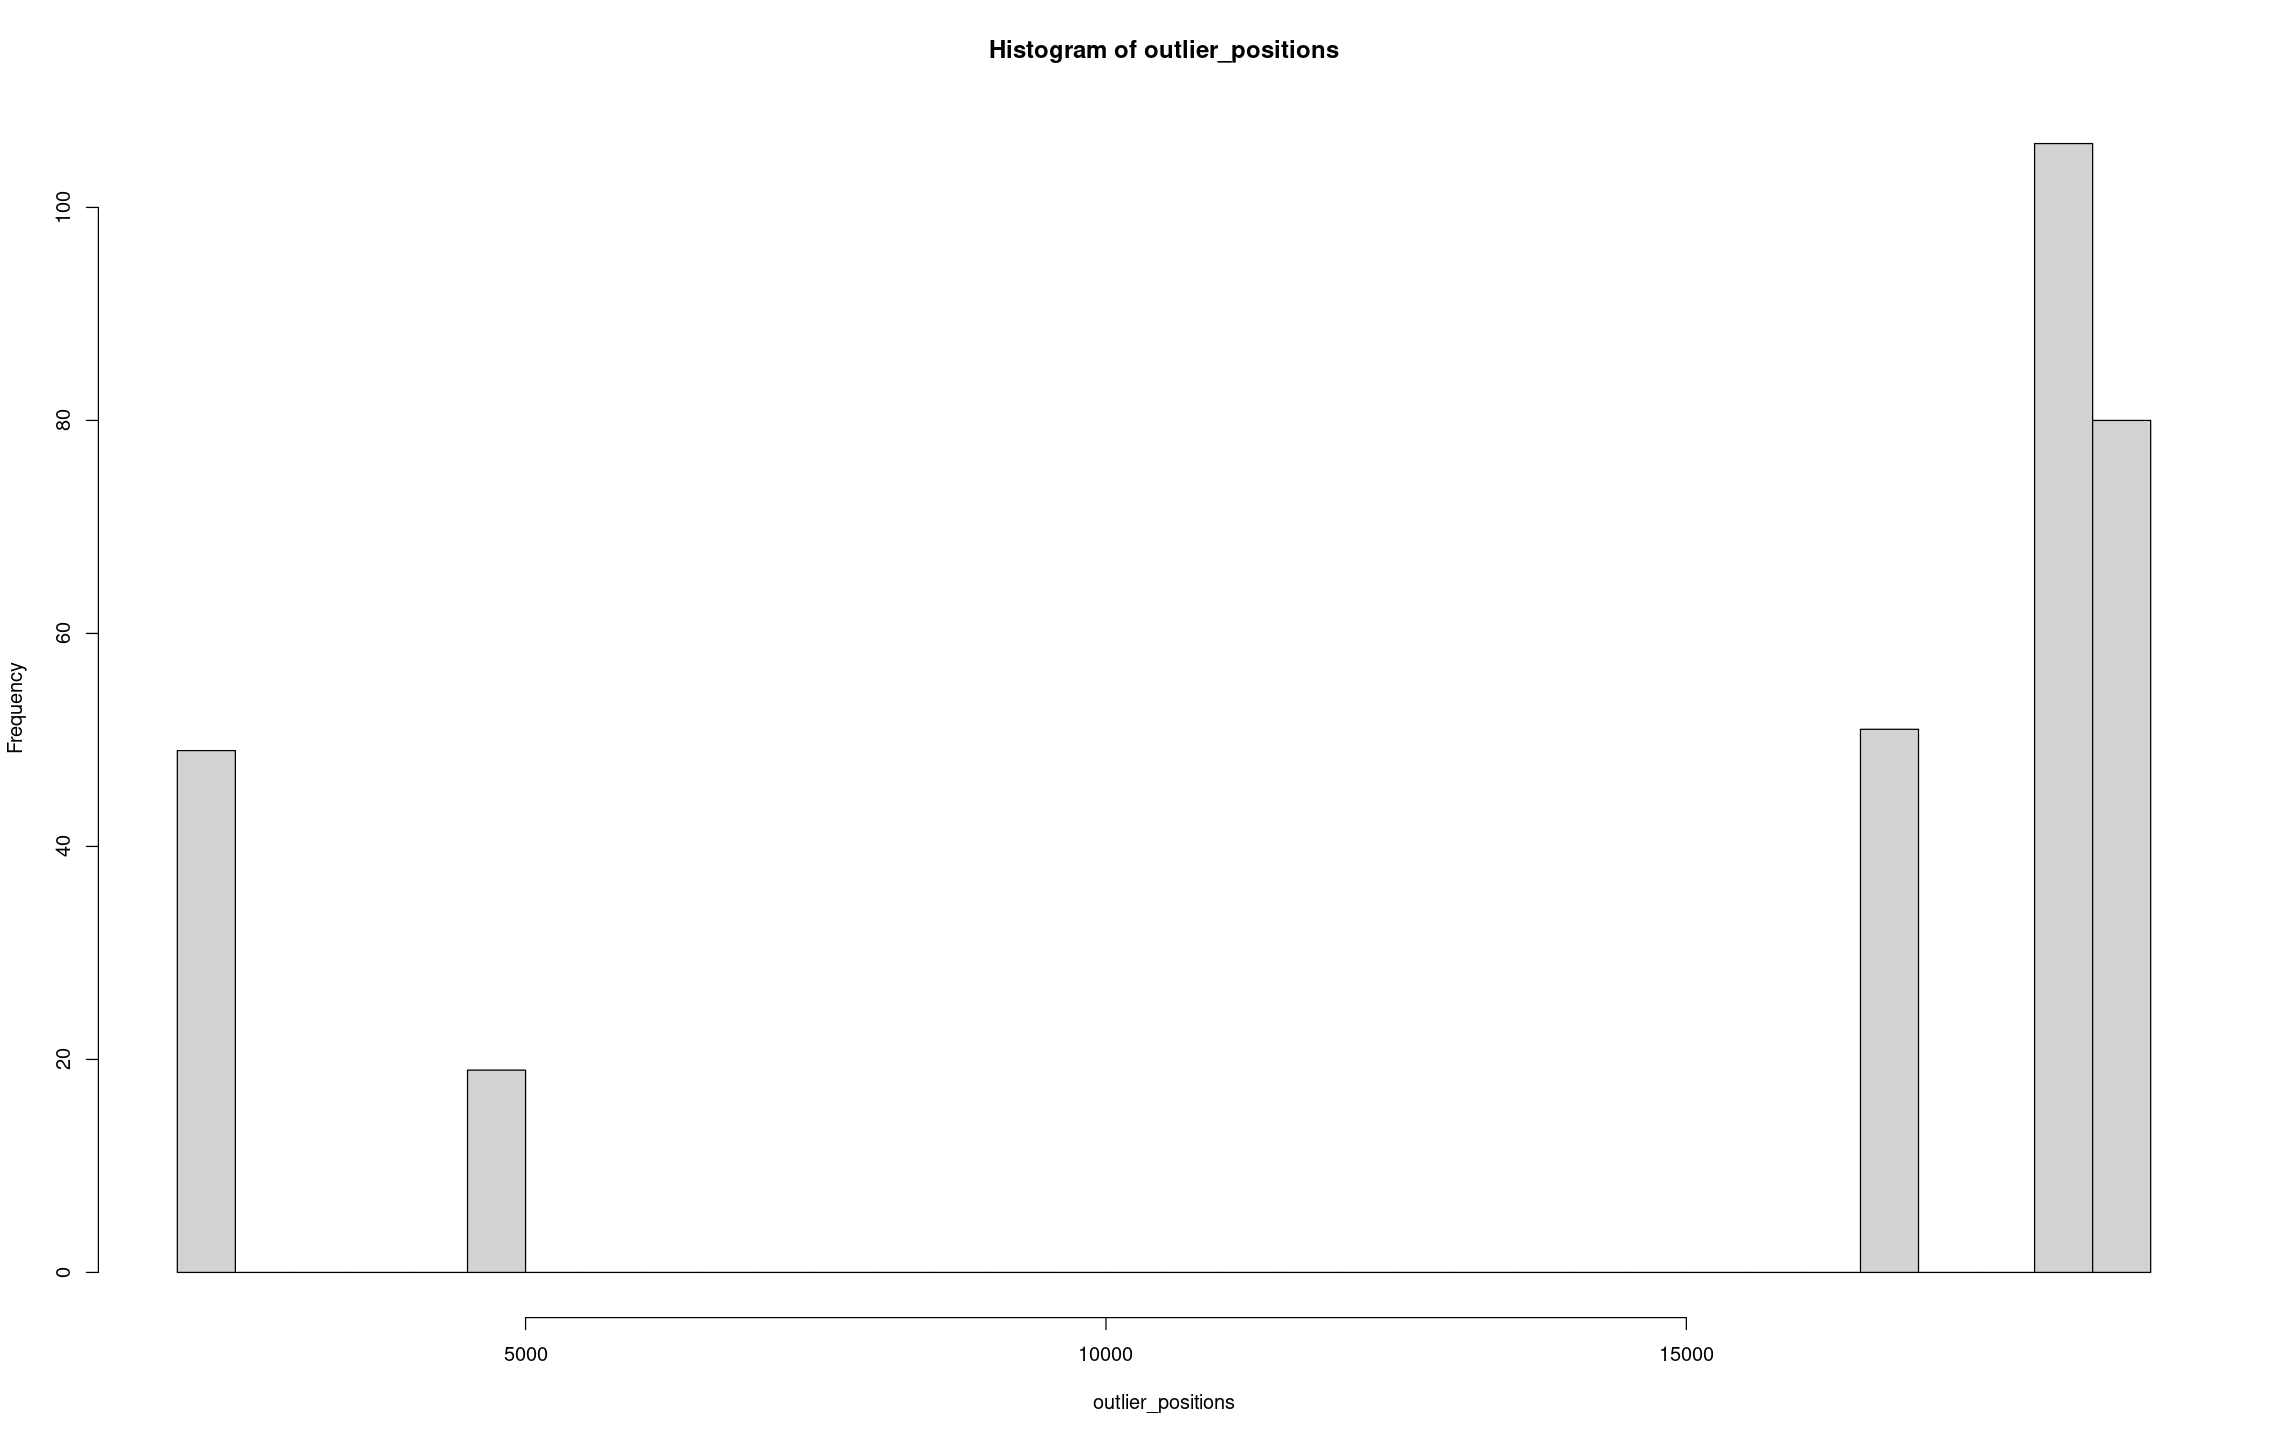

In [157]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

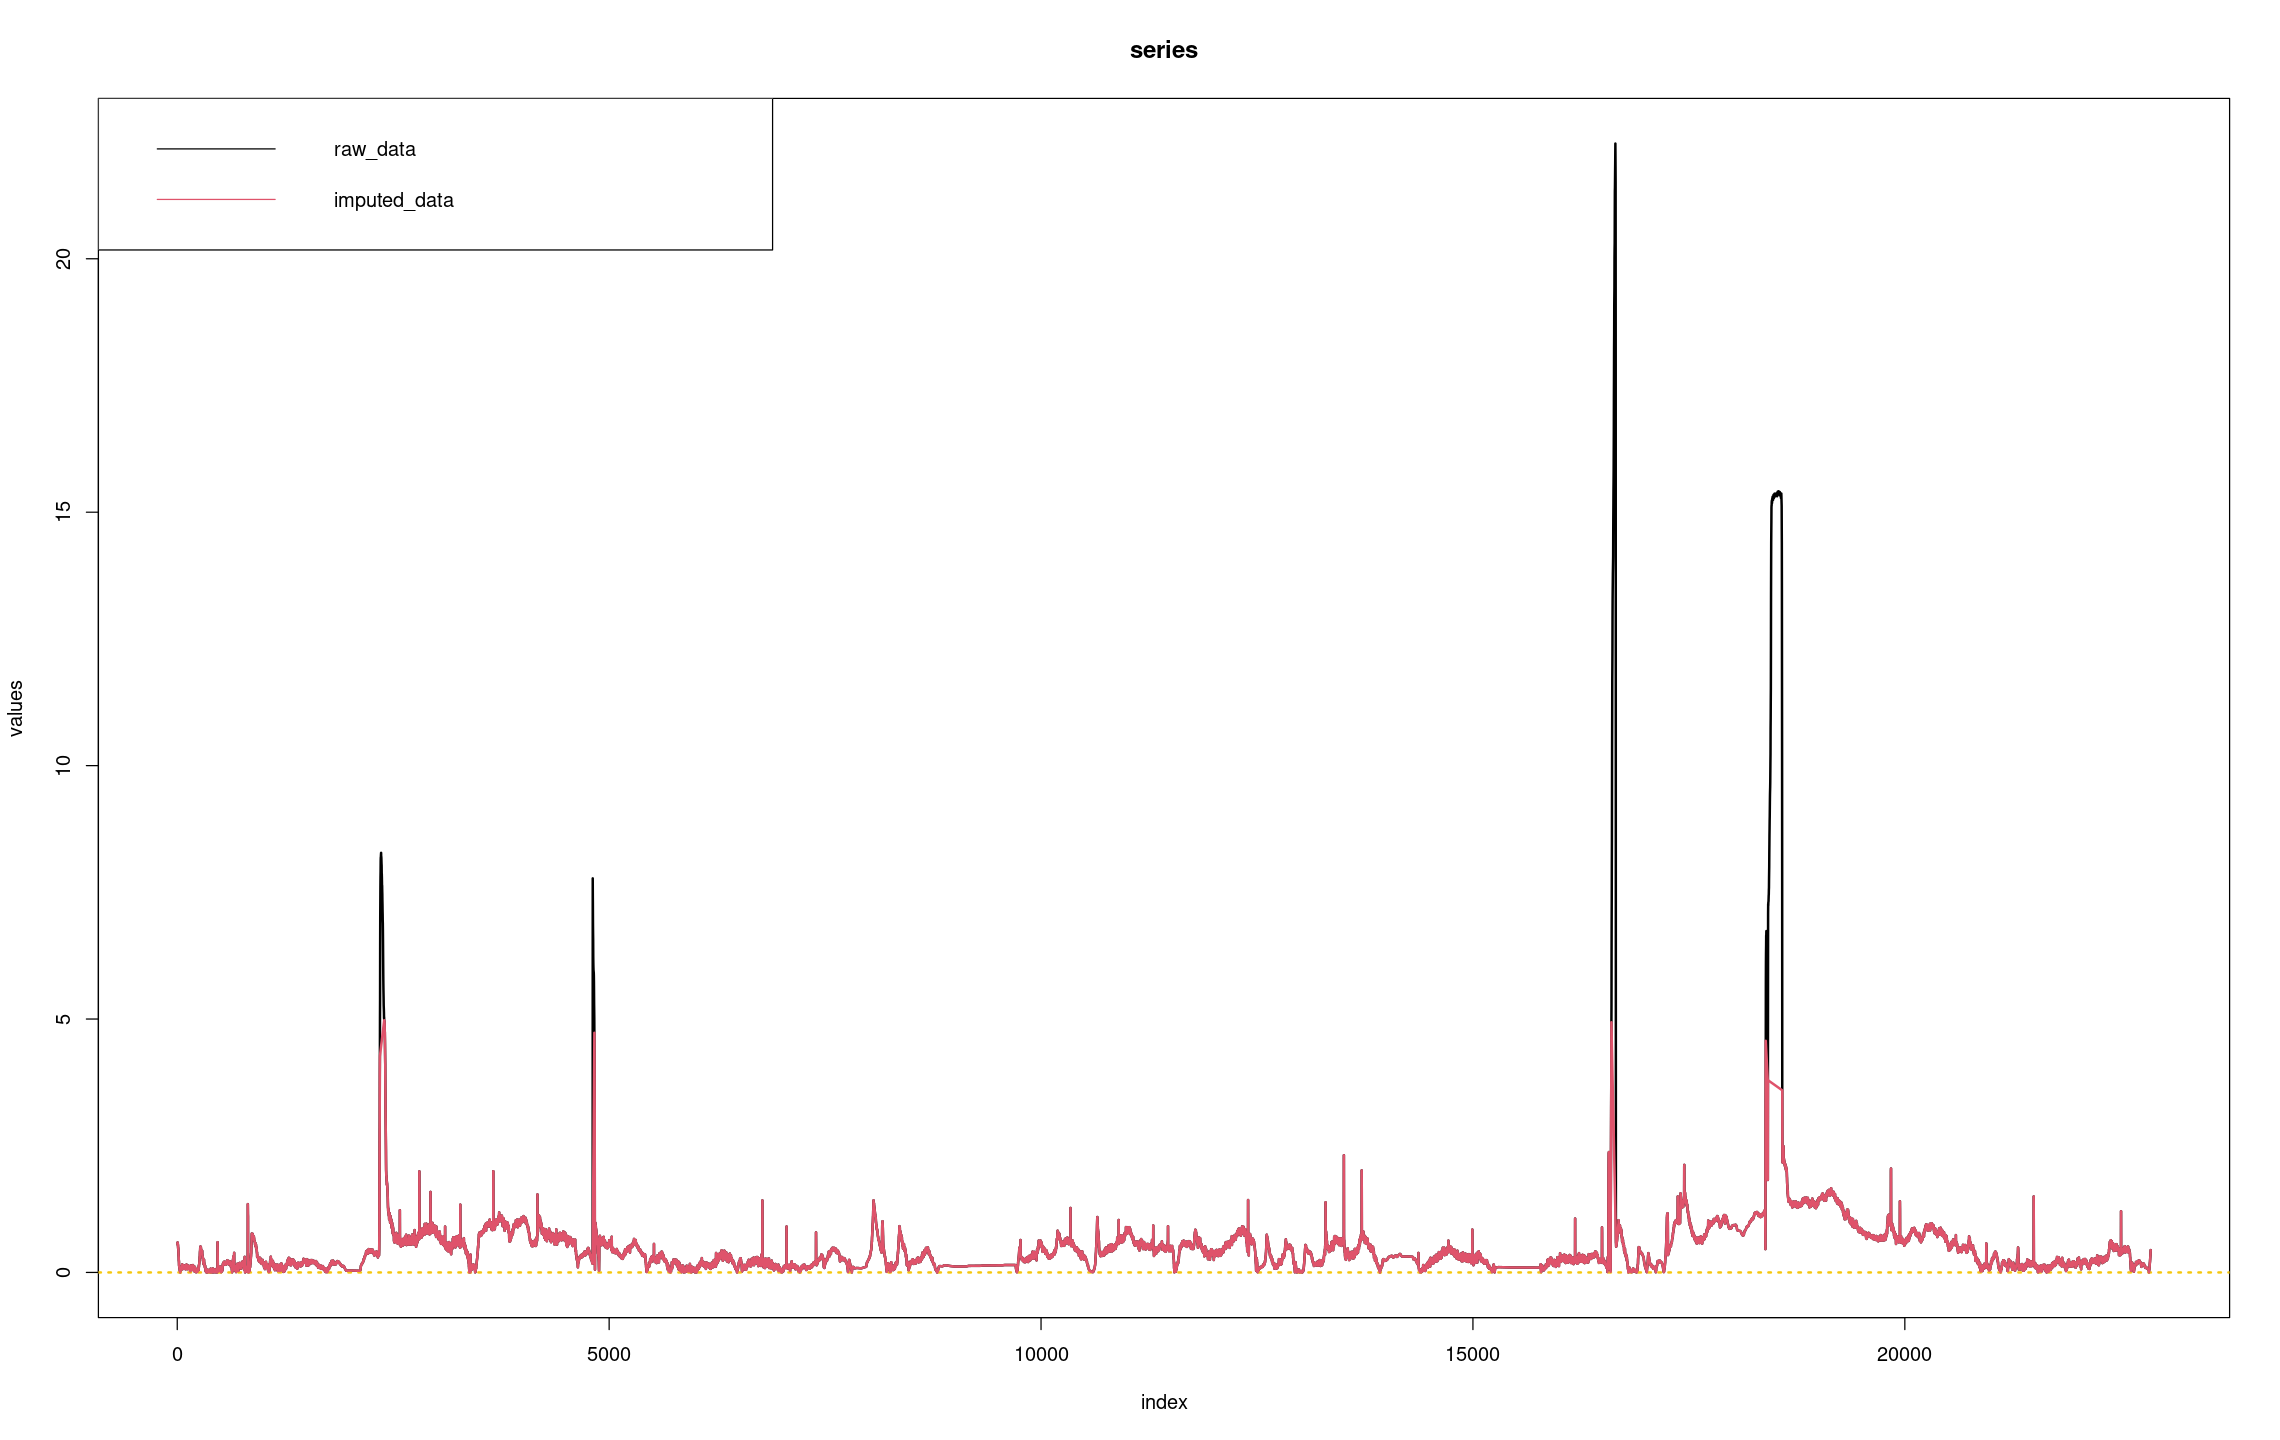

In [158]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(x_raw_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [159]:
# data with imputed outliers
x <- x_raw_object$imputed_data 
data_clean <- data
n <- length(x)

In [160]:
# data with removed outliers
# x <- x_raw[-outlier_positions]
# n <- length(x)
# data_clean <- data[-outlier_positions, ]

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           22'846           22'846                0           22'580
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0481903096661  0.0872314460575  0.1457093060018  0.3255155980590
                                                                    
            range               sd            vcoef              mad
  4.9767084120450  0.5421802981304  1.1428696750141  0.3093819649219
                                                                    
               0s             mean            meanCI
                0  0.4744025587377   0.4673716777438
             0.0%                    0.4814334397315
                                                    
    

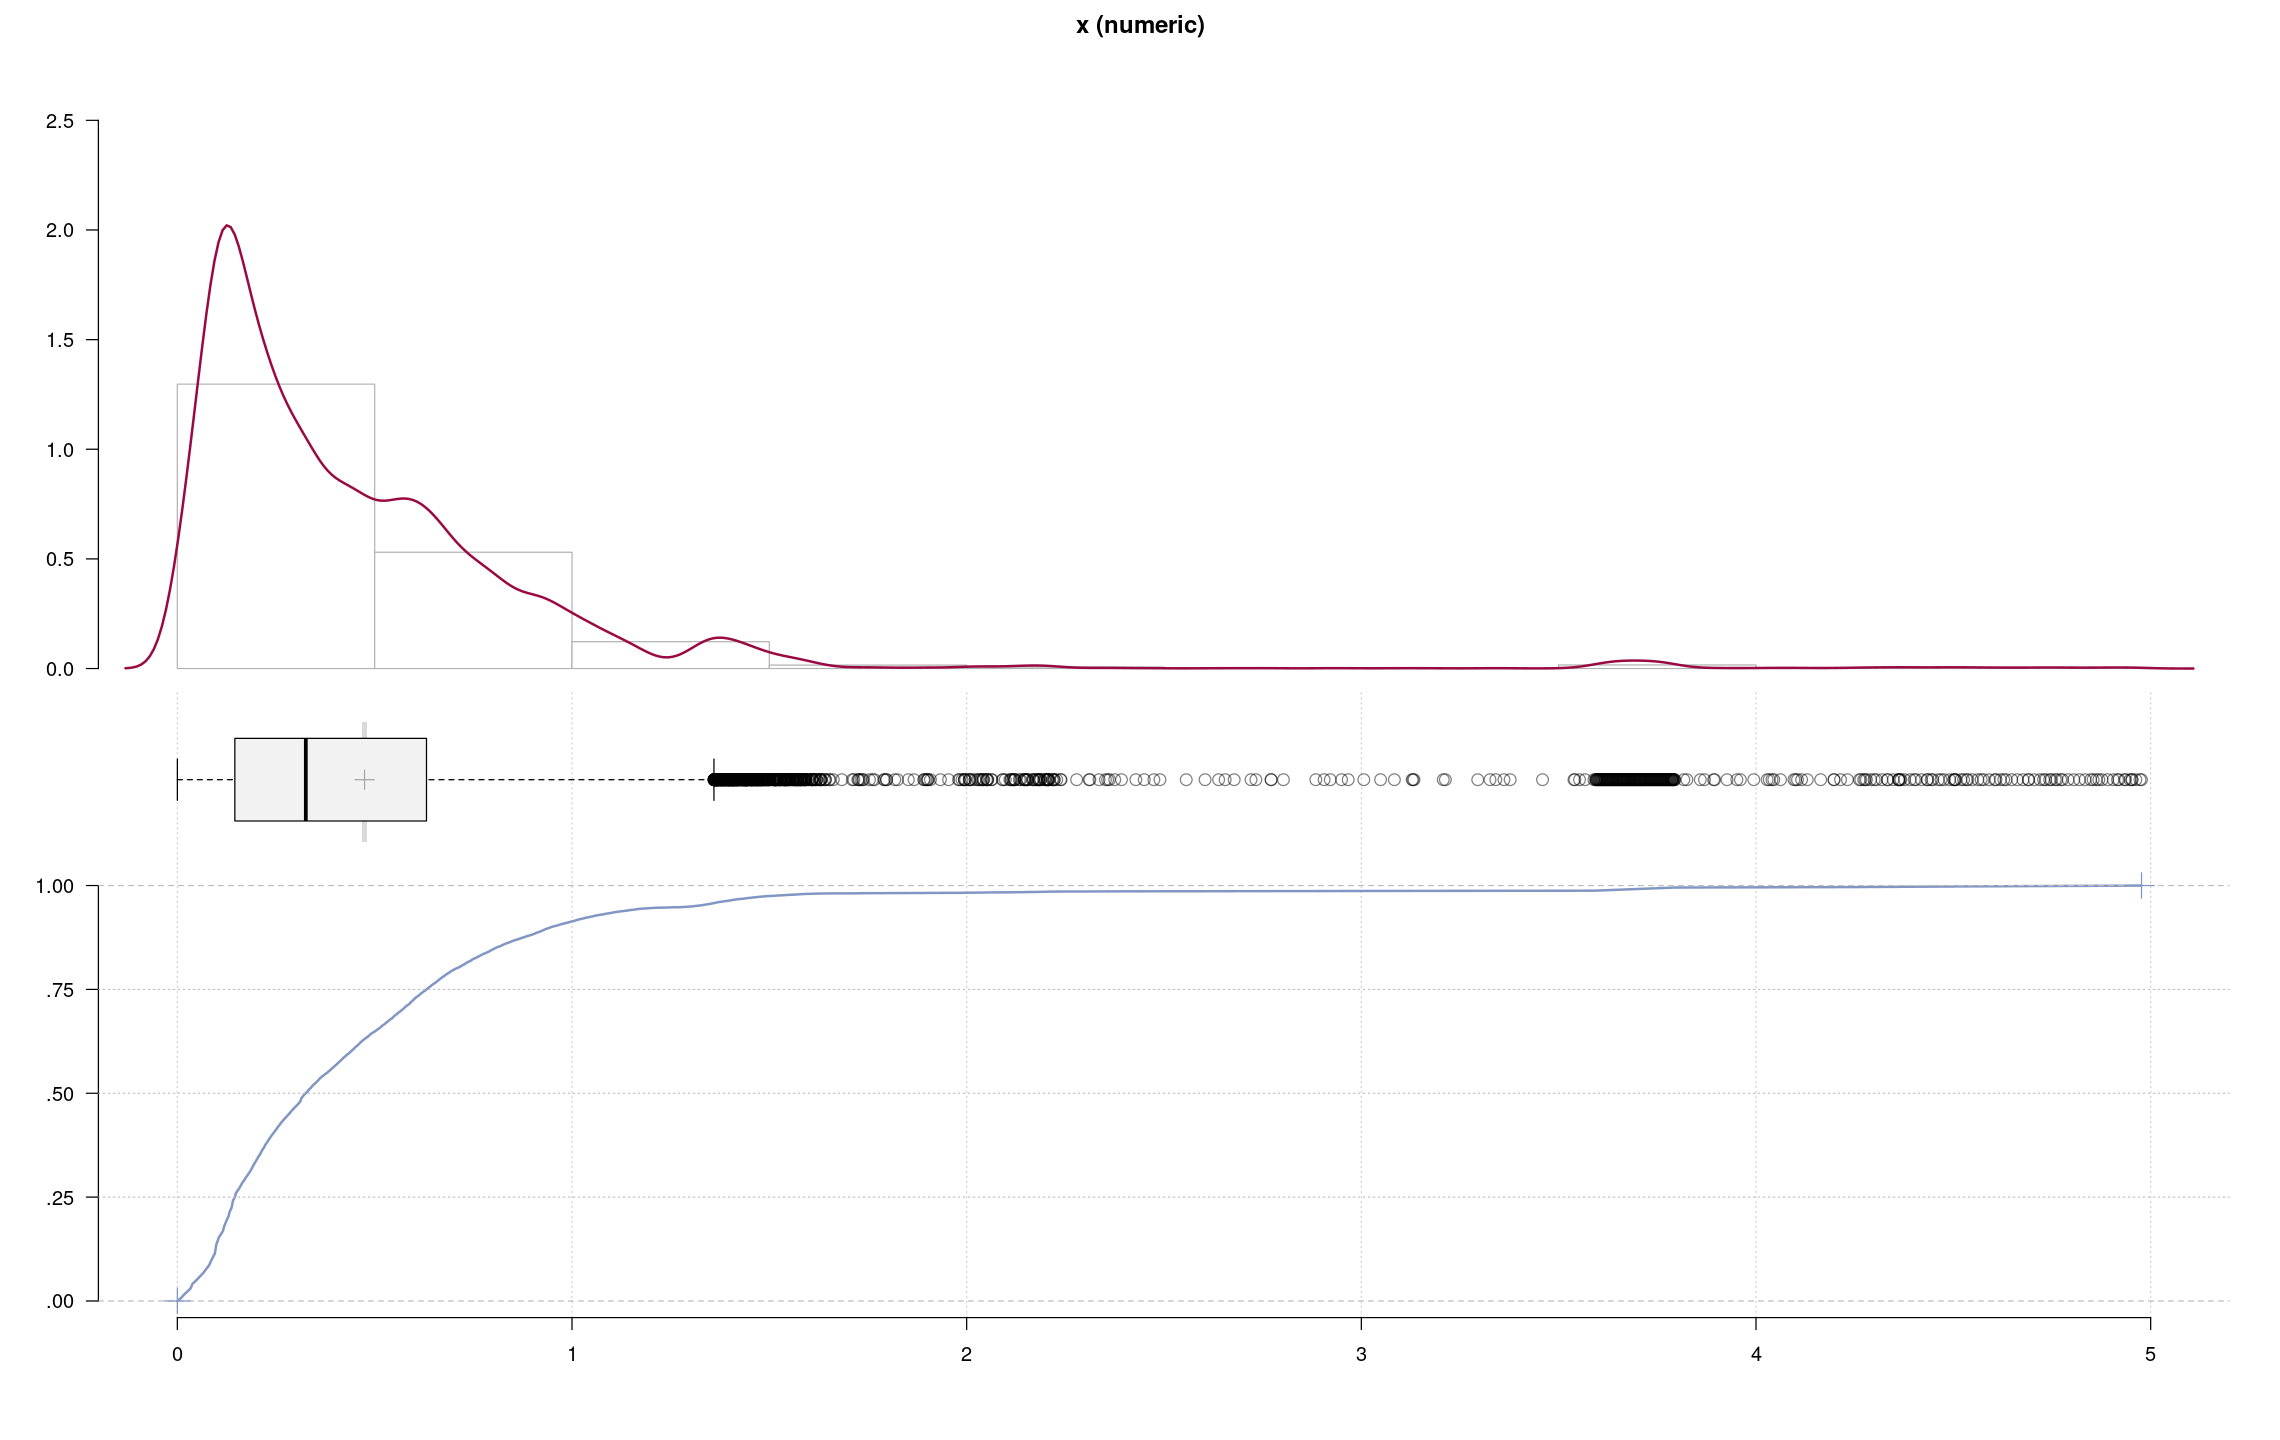

In [161]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

In [162]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# nlargest <- 3000
# y <- extract_nlargest_sample(x, n = nlargest)
# Desc(y)

## Predictor variables

In [163]:
# # select the predictor variables
# data_covariates <- data_clean %>% select(!c(timestamp, latitude, longitude, velocity_latitude, velocity_longitude,
#                                             lateral_error, longitudinal_error, haversine_error, latitude_error,
#                                             longitude_error, heading_error, lateral_error_abs, longitudinal_error_abs,
#                                             haversine_error_abs, latitude_error_abs, longitude_error_abs, heading_error_abs))
# 
# str(data_covariates)

In [164]:
# select the predictor variables
data_covariates <- data_clean %>% select(c(velocity, object, area))

str(data_covariates)

tibble [22,846 × 3] (S3: tbl_df/tbl/data.frame)
 $ velocity: num [1:22846] 5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ object  : num [1:22846] 20 23 27 19 24 25 24 23 25 21 ...
 $ area    : num [1:22846] 0.555 0.745 0.603 0.376 0.383 ...


In [165]:
# Remove columns containing only zeros
# data_covariates_clean <- data_covariates %>% select(where(~ sum(.) != 0))
data_covariates_clean <- data_covariates %>% select_if(colSums(.) != 0)

str(data_covariates_clean)

tibble [22,846 × 3] (S3: tbl_df/tbl/data.frame)
 $ velocity: num [1:22846] 5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ object  : num [1:22846] 20 23 27 19 24 25 24 23 25 21 ...
 $ area    : num [1:22846] 0.555 0.745 0.603 0.376 0.383 ...


In [166]:
# describe(data_covariates_clean)

In [167]:
# scale all predictors variables

data_covariates_clean_scaled <- get_standard_scaled_data(data_covariates_clean, newdata = NULL)

str(data_covariates_clean_scaled)

'data.frame':	22846 obs. of  3 variables:
 $ velocity: num  -0.546 -0.788 -0.809 -0.56 -0.743 ...
 $ object  : num  -1.213 -0.946 -0.589 -1.302 -0.857 ...
 $ area    : num  -1.098 -0.525 -0.955 -1.638 -1.618 ...


# Model selection

## Candidate block sizes

In [168]:
minimum_block_size <- find_minimum_block_size(x, threshold = min(x))

print(minimum_block_size)

[1] 3


In [169]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x, m = 50)

print(maximum_block_size)

[1] 456


In [170]:
maxima <- extract_block_maxima(x, block_size = minimum_block_size)

print(min(maxima))

[1] 0.002079647267


In [171]:
print(median(x))

[1] 0.3255155981


In [172]:
print(calculate_mode(x))

[1] 0.1249717706


In [173]:
candidate_block_sizes <- get_candidate_block_sizes(x, threshold = min(x), m = 50)

print(candidate_block_sizes)

  [1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
[145] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[163] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
[181] 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
[199] 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
[217] 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

## Hyperparameters

In [174]:
use.phi <- TRUE
nlargest <- 3000
block_sizes <- NULL
minimum_nblocks <- 50
threshold <- min(x)
confidence_level <- 0.95
use_extremal_index <- TRUE
use_uniform_prior <- TRUE
method <- "MLE"

## Candidate models

In [175]:


models_object <- c(list("model_01" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_02" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_03" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~object),
                        
                        "model_04" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_05" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_06" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_07" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_08" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_09" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_10" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_11" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_12" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~object),

                        "model_13" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_14" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_15" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~area),

                        "model_16" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_17" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_18" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_19" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~object),
                        "model_20" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~area),
                        "model_21" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_22" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~1),
                        
                        "model_23" = list("location.fun" = ~object, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_24" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_25" = list("location.fun" = ~area, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_26" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~object),

                        "model_27" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~area),
                        "model_28" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~object),

                        
                        "model_29" = list("location.fun" = ~velocity, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_30" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~area),
                        
                        "model_31" = list("location.fun" = ~area, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_32" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_33" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~area),
                        "model_34" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~velocity),
                       
                       
                        "model_35" = list("location.fun" = ~object, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_36" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        
                        "model_37" = list("location.fun" = ~velocity, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_38" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~object),

                        "model_39" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~velocity),
                        "model_40" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~object),
                       
                       
                        "model_41" = list("location.fun" = ~object, "scale.fun" = ~area, "shape.fun" = ~velocity),
                        "model_42" = list("location.fun" = ~object, "scale.fun" = ~velocity, "shape.fun" = ~area),
                        
                        "model_43" = list("location.fun" = ~area, "scale.fun" = ~object, "shape.fun" = ~velocity),
                        "model_44" = list("location.fun" = ~area, "scale.fun" = ~velocity, "shape.fun" = ~object),
                        
                        "model_45" = list("location.fun" = ~velocity, "scale.fun" = ~object, "shape.fun" = ~area),
                        "model_46" = list("location.fun" = ~velocity, "scale.fun" = ~area, "shape.fun" = ~object)))



In [176]:
# models_object

## Estimations

In [177]:
defaultW <- getOption("warn") 

options(warn = -1) 


fitted_models_object <- lapply(models_object, function(model){
    try({
        ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x =x,
                                                                        data = data_covariates_clean_scaled,
                                                                        location.fun = model$location.fun,
                                                                        scale.fun = model$scale.fun,
                                                                        shape.fun = model$shape.fun,
                                                                        use.phi = use.phi,
                                                                        nlargest = nlargest,
                                                                        block_sizes = block_sizes,
                                                                        minimum_nblocks = minimum_nblocks,
                                                                        threshold = threshold,
                                                                        confidence_level = confidence_level,
                                                                        use_extremal_index = use_extremal_index,
                                                                        use_uniform_prior = use_uniform_prior,
                                                                        method = method)

        model_vector <- as.character(model)
        names(model_vector) <- c("location.fun", "scale.fun", "shape.fun")

        information_criteria <- ns_gev_mixture_model_object$information_criteria

        c(model_vector, information_criteria)
    },
        silent = TRUE)

})


options(warn = defaultW)

Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning mes

In [178]:
success <- sapply(fitted_models_object, function(x) !inherits(x, "try-error"))

success

model_01 model_02 model_03 model_04 model_05 model_06 model_07 model_08 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_09 model_10 model_11 model_12 model_13 model_14 model_15 model_16 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_17 model_18 model_19 model_20 model_21 model_22 model_23 model_24 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_25 model_26 model_27 model_28 model_29 model_30 model_31 model_32 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_33 model_34 model_35 model_36 model_37 model_38 model_39 model_40 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE     TRUE 
model_41 model_42 model_43 model_44 model_45 model_46 
    TRUE     TRUE     TRUE     TRUE     TRUE     TRUE

In [179]:
table(success)

success
TRUE 
  46 

In [180]:
fitted_models_object_success <- fitted_models_object[success]

fitted_models_object_success_df <- do.call(rbind, fitted_models_object_success)

fitted_models_object_success_df <- data.frame("model_names" = rownames(fitted_models_object_success_df),
                                             fitted_models_object_success_df)

rownames(fitted_models_object_success_df) <- 1:nrow(fitted_models_object_success_df)

fitted_models_object_success_df

,model_names,location.fun,scale.fun,shape.fun,AIC,BIC
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,model_01,~object,~1,~1,5604.5123355711,6199.14272476847
2,model_02,~1,~object,~1,7472.42005615677,8247.24147238365
3,model_03,~1,~1,~object,7199.56580210662,7914.323542657
4,model_04,~area,~1,~1,4766.71913485077,5271.25401053339
5,model_05,~1,~area,~1,5306.38625048348,5840.95296400435
6,model_06,~1,~1,~area,6146.9899029687,6771.65213000433
7,model_07,~velocity,~1,~1,6964.03367197452,7678.7914125249
8,model_08,~1,~velocity,~1,7098.19560160092,7842.98517998956
9,model_09,~1,~1,~velocity,6416.13854504456,7040.80077208018


In [181]:

write.csv(x = fitted_models_object_success_df, file = "./fitted_models_information.csv", row.names = FALSE)


# Best model

## Identification

In [182]:

fitted_models_information <- xfun::in_dir(dir = path, expr = read.csv(file = "./04_experimentation_01/fitted_models_information.csv", sep = ","))

str(fitted_models_information)


'data.frame':	46 obs. of  6 variables:
 $ model_names : chr  "model_01" "model_02" "model_03" "model_04" ...
 $ location.fun: chr  "~object" "~1" "~1" "~area" ...
 $ scale.fun   : chr  "~1" "~object" "~1" "~1" ...
 $ shape.fun   : chr  "~1" "~1" "~object" "~1" ...
 $ AIC         : num  5605 7472 7200 4767 5306 ...
 $ BIC         : num  6199 8247 7914 5271 5841 ...


In [183]:
fitted_models_information

model_names,location.fun,scale.fun,shape.fun,AIC,BIC
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
model_01,~object,~1,~1,5604.512336,6199.142725
model_02,~1,~object,~1,7472.420056,8247.241472
model_03,~1,~1,~object,7199.565802,7914.323543
model_04,~area,~1,~1,4766.719135,5271.254011
model_05,~1,~area,~1,5306.386250,5840.952964
model_06,~1,~1,~area,6146.989903,6771.652130
model_07,~velocity,~1,~1,6964.033672,7678.791413
model_08,~1,~velocity,~1,7098.195602,7842.985180
model_09,~1,~1,~velocity,6416.138545,7040.800772


In [184]:
rank <- order(fitted_models_information$AIC)

fitted_models_information_sorted <- fitted_models_information %>% slice(rank)

fitted_models_information_sorted

model_names,location.fun,scale.fun,shape.fun,AIC,BIC
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
model_22,~1,~1,~1,4635.558866,4989.934553
model_04,~area,~1,~1,4766.719135,5271.254011
model_05,~1,~area,~1,5306.386250,5840.952964
model_01,~object,~1,~1,5604.512336,6199.142725
model_14,~area,~1,~area,5697.031149,6483.865300
model_13,~area,~area,~1,5849.702073,6564.459813
model_15,~1,~area,~area,6108.397782,6931.270139
model_06,~1,~1,~area,6146.989903,6771.652130
model_09,~1,~1,~velocity,6416.138545,7040.800772


In [186]:
selected_model <- models_object$model_04

selected_model

$location.fun
~area

$scale.fun
~1

$shape.fun
~1


## Estimation

In [187]:

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x =x,
                                                                    data = data_covariates_clean_scaled,
                                                                    location.fun = selected_model$location.fun,
                                                                    scale.fun = selected_model$scale.fun,
                                                                    shape.fun = selected_model$shape.fun,
                                                                    use.phi = use.phi,
                                                                    nlargest = nlargest,
                                                                    block_sizes = block_sizes,
                                                                    minimum_nblocks = minimum_nblocks,
                                                                    threshold = threshold,
                                                                    confidence_level = confidence_level,
                                                                    use_extremal_index = use_extremal_index,
                                                                    use_uniform_prior = use_uniform_prior,
                                                                    method = method)



In [188]:
print(names(ns_gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "selected_ns_gev_coefficients"         
[16] "unnormalized_gev_parameters_object"   
[17] "normalized_gev_parameters_object"     
[18] "full_normalized_gev_parameters_object"
[19] "selected_model_per_obs"               
[20] "all_data_covariates"                  
[21] "partial_data_covariates"              
[22] "partial_data"                         
[23] "all_

In [189]:
ns_gev_mixture_model_object$selected_ns_gev_coefficients

,mu0,mu1,scale,shape
,<dbl>,<dbl>,<dbl>,<dbl>
2,1.031453629,0.005573538183,0.1917066401,0.8372243637
3,1.044822285,0.007699569990,0.1973704050,0.8141511213
5,1.059178265,0.009338593035,0.2019759531,0.8164640555
8,1.079739684,0.012239420553,0.2138432172,0.8045388315
16,1.123091375,0.014600612635,0.2396475332,0.7719587005
21,1.140861192,0.015377113648,0.2544227767,0.7301749972
22,1.142838497,0.016012452355,0.2538403314,0.7474137588
25,1.162398920,0.014587616930,0.2741656111,0.7271788411
30,1.173858451,0.009356119779,0.2708211590,0.7530780925


In [191]:
data.frame("weights" = ns_gev_mixture_model_object$weights)

,weights
,<dbl>
2,0.286956521739
3,0.137123745819
5,0.005016722408
8,0.011705685619
16,0.001003344482
21,0.001003344482
22,0.095652173913
25,0.002341137124
30,0.015719063545


In [192]:
highest_weighted_model <- which.max(ns_gev_mixture_model_object$weights)

highest_weighted_model

2 
1

In [193]:
model_quality <- round(ns_gev_mixture_model_object$information_criteria, 3)

model_quality

AIC      BIC 
4766.719 5271.254

## Diagnostic

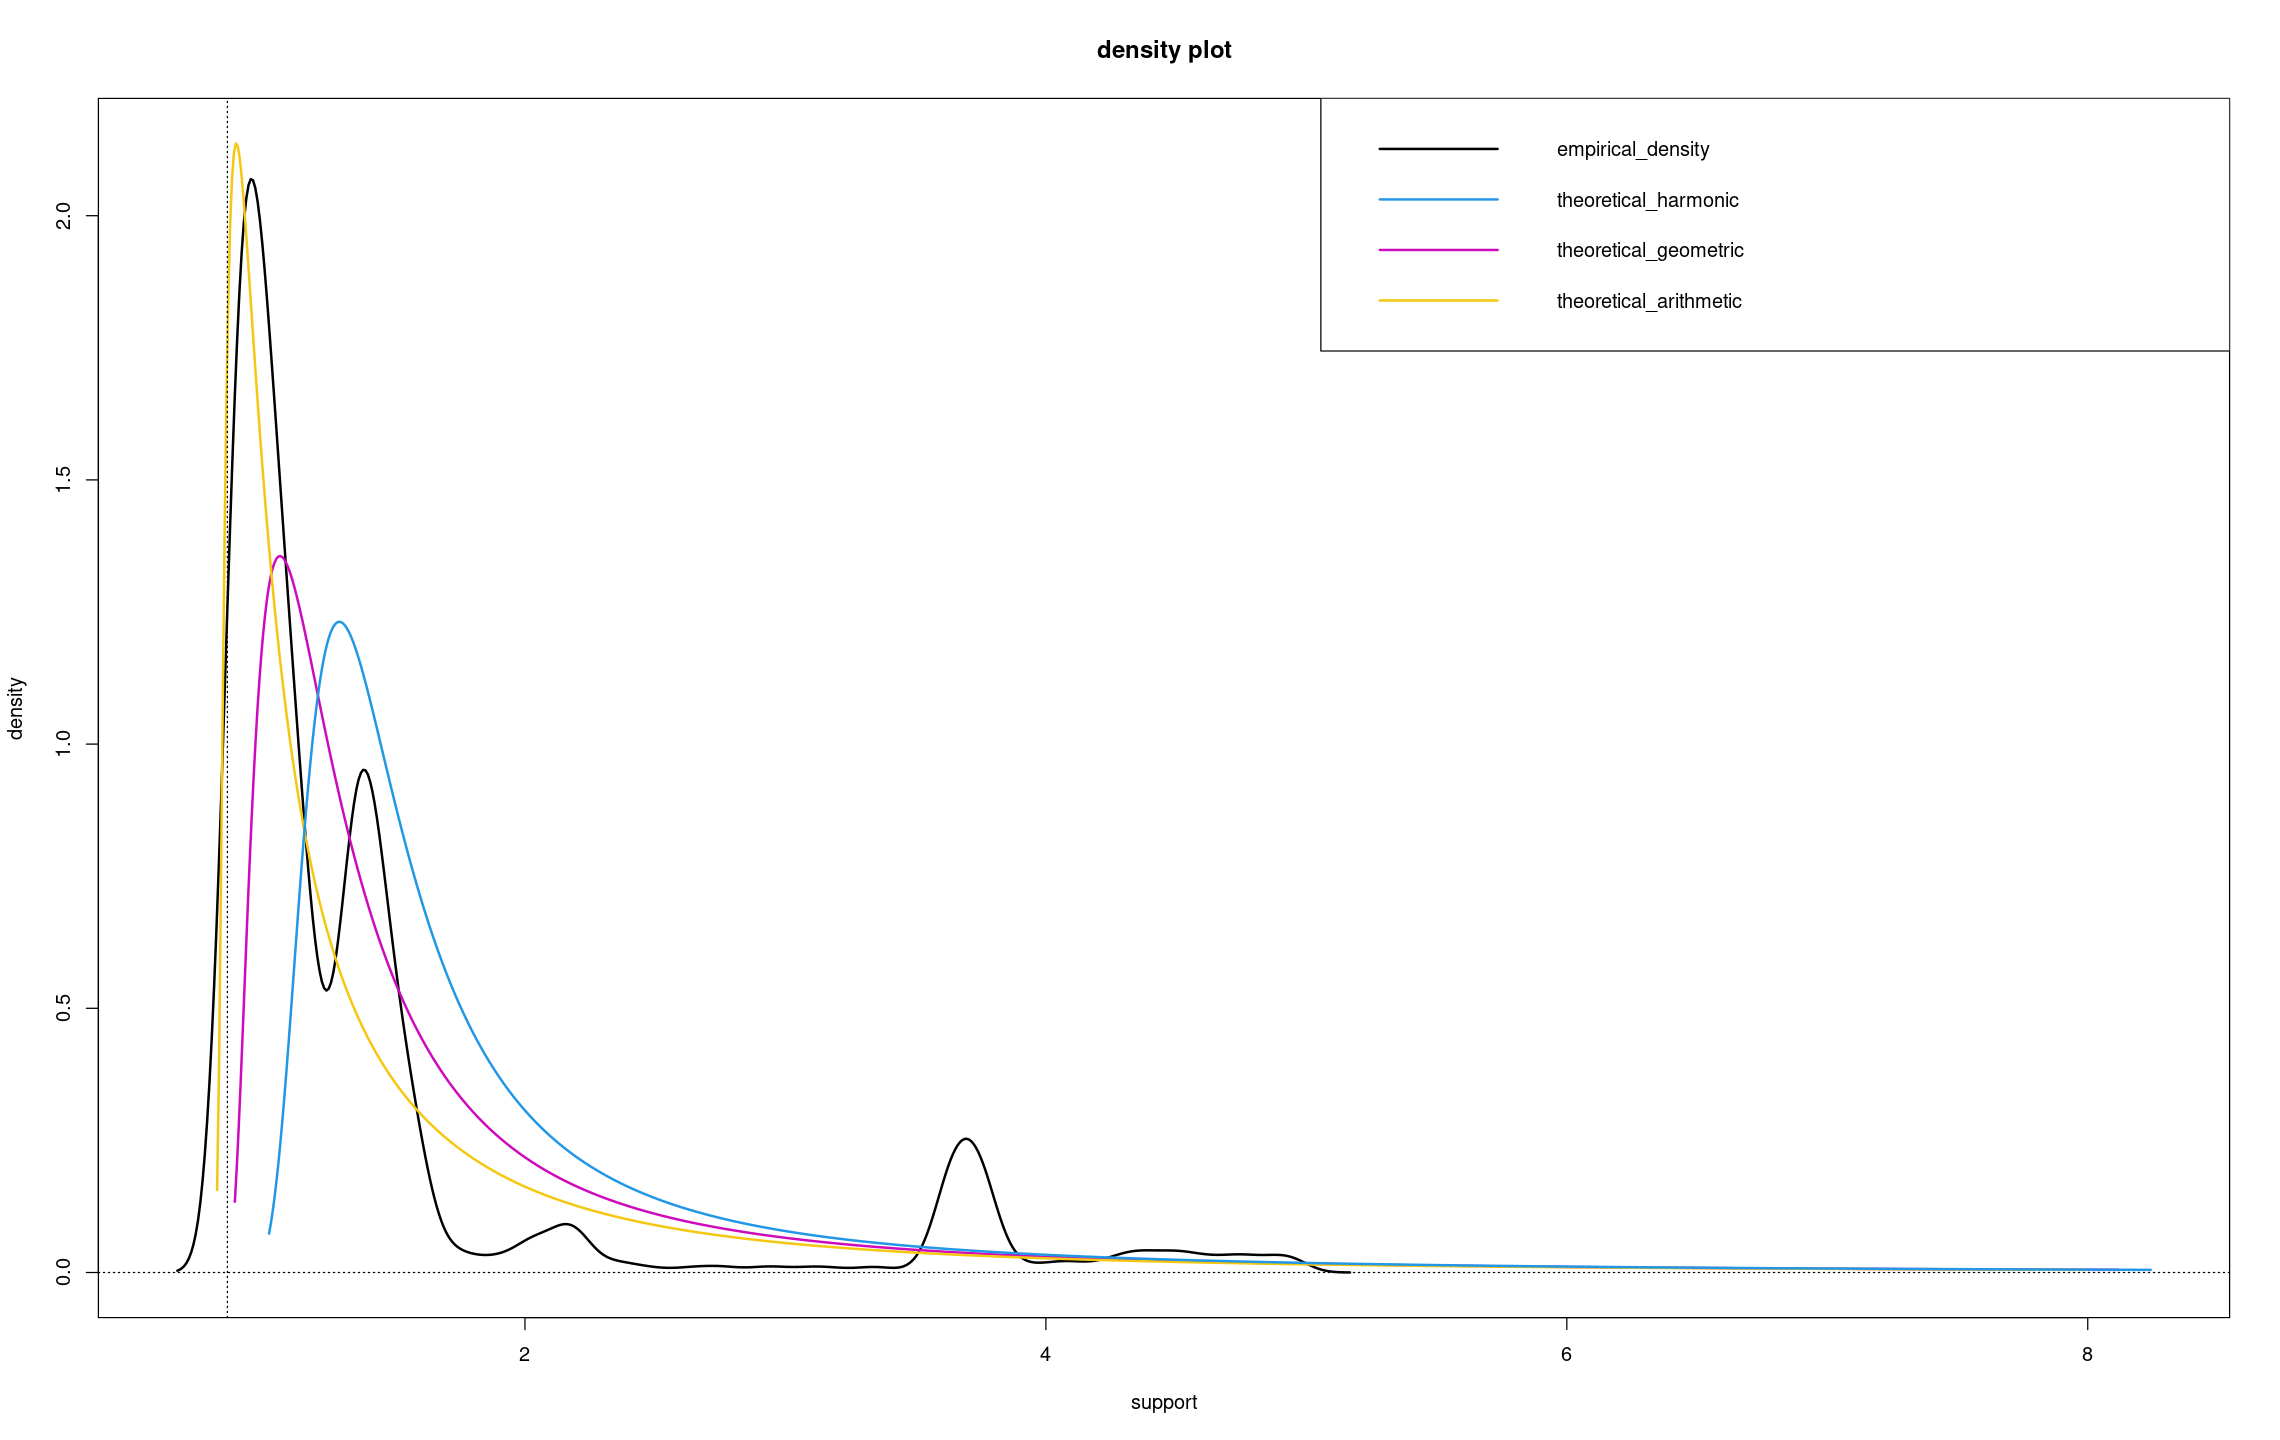

In [194]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = 0,
                                          zoom_threshold = NULL,
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

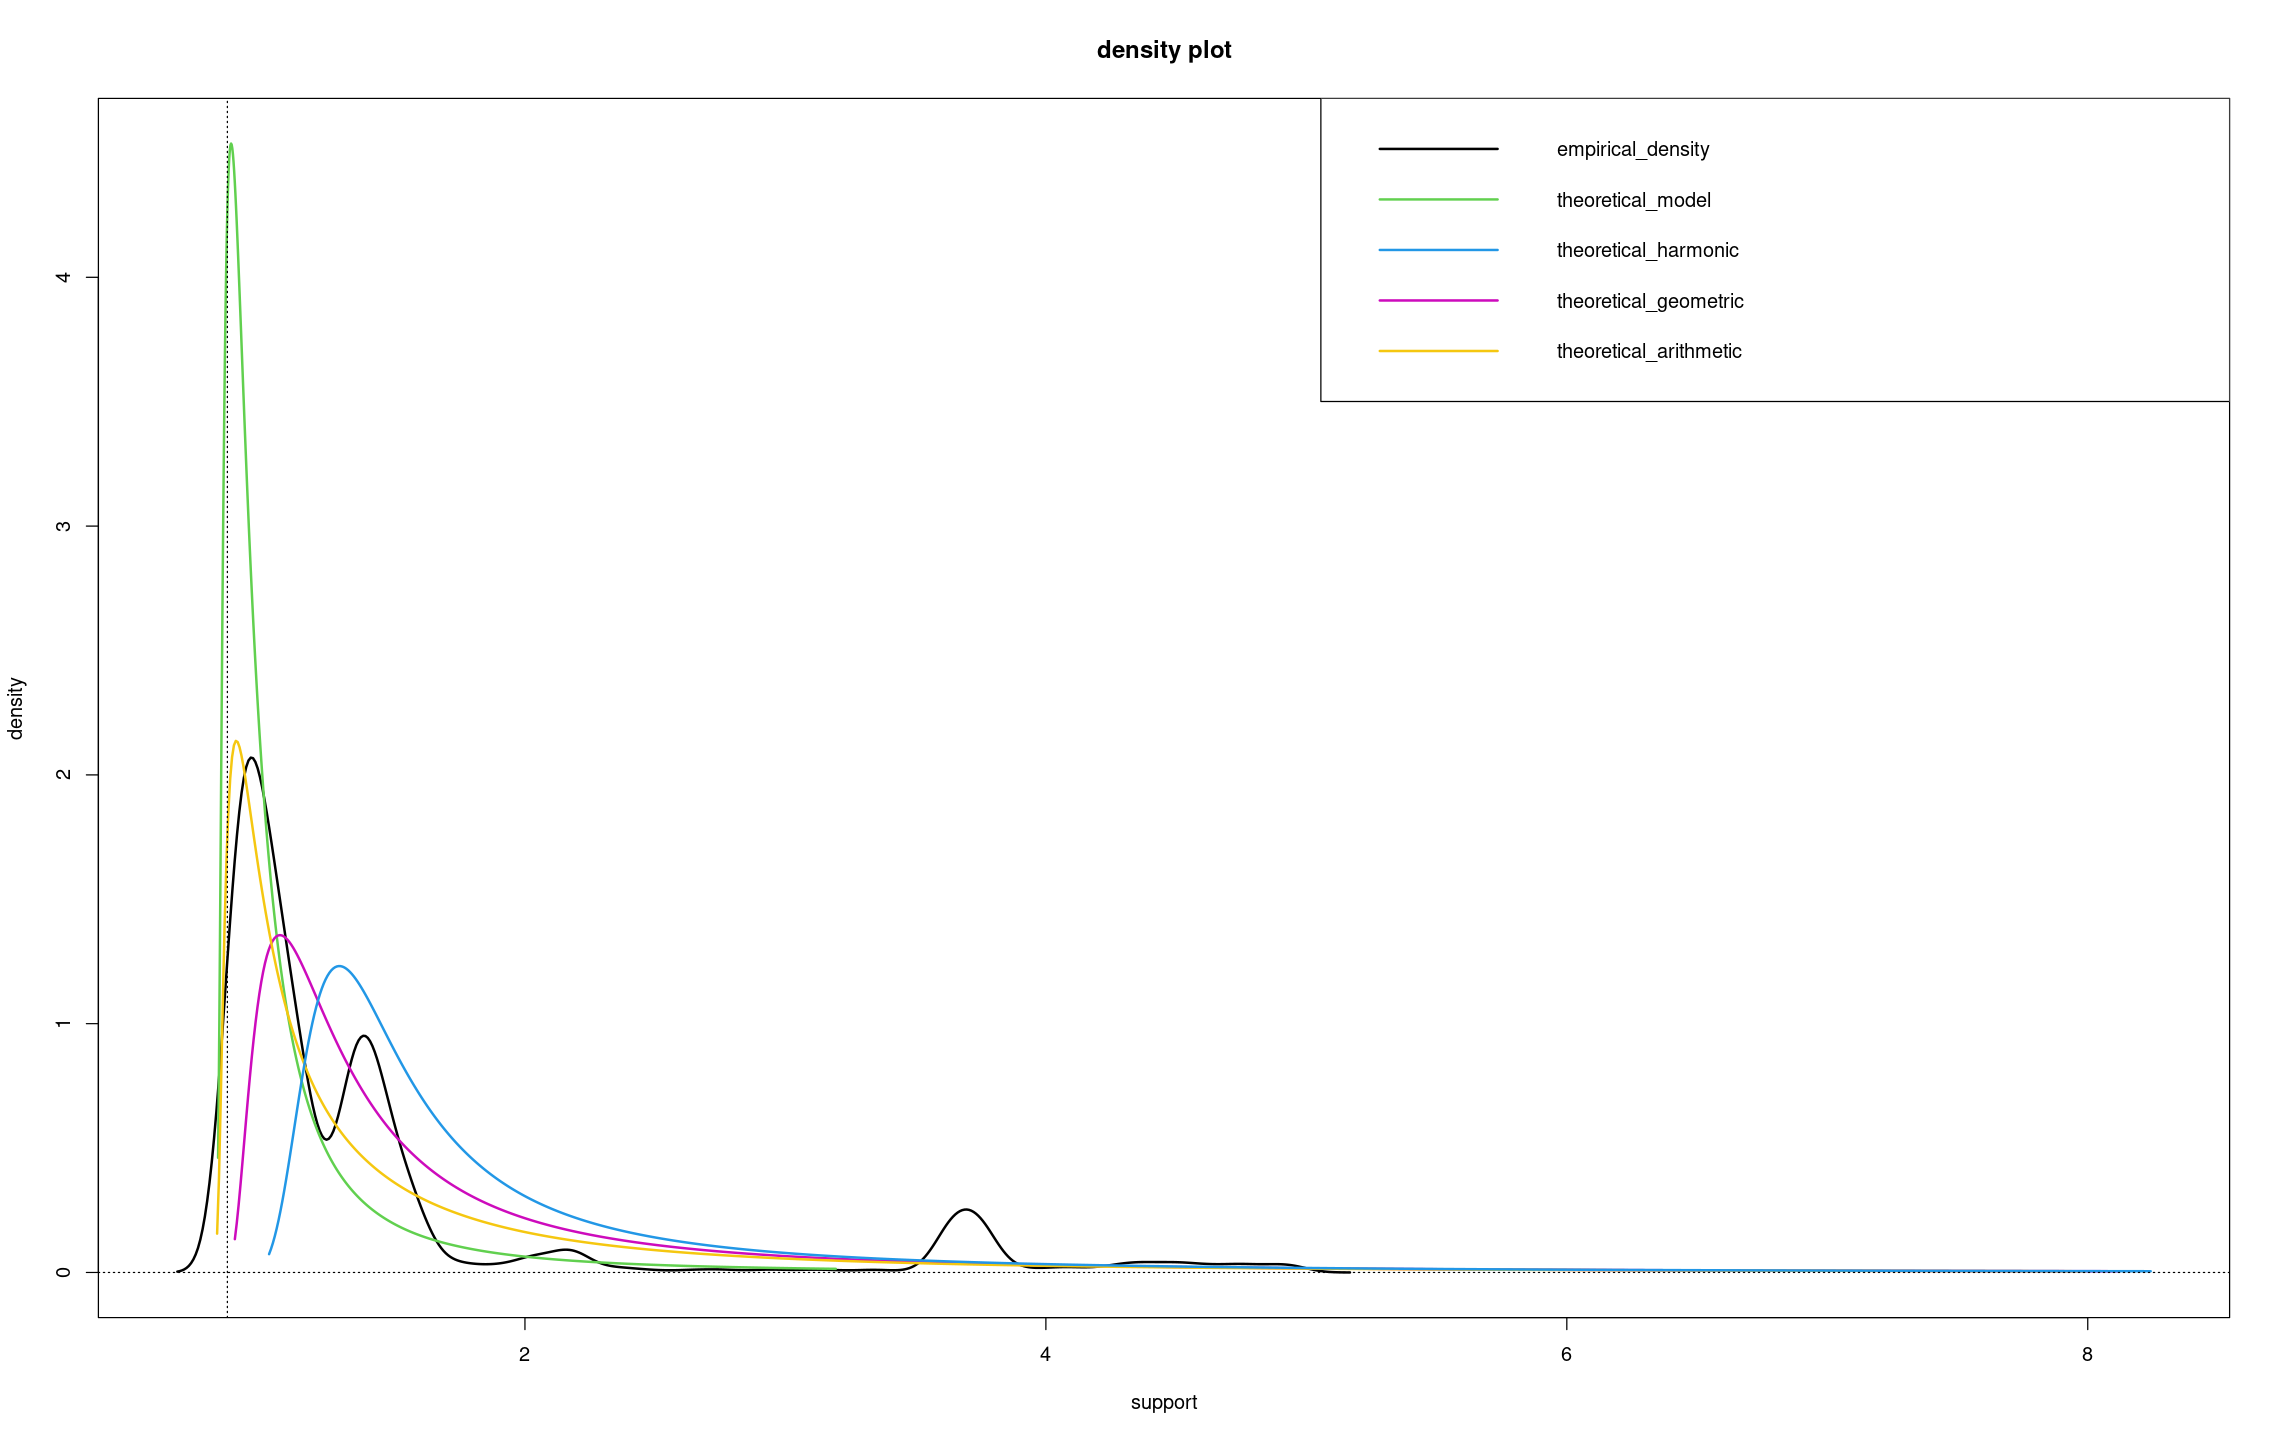

In [195]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = which.max(ns_gev_mixture_model_object$weights),
                                          zoom_threshold = NULL,
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

## Quantiles

In [282]:
partial_data <- ns_gev_mixture_model_object$partial_data

threshold <- quantile(partial_data, probs = 0.975)

positions <- partial_data > threshold

partial_data_covariates <- ns_gev_mixture_model_object$partial_data_covariates[positions, ]

partial_data_observations <- partial_data[positions]

In [283]:
tail(partial_data_covariates)

,velocity,object,area
,<dbl>,<dbl>,<dbl>
1748,-0.6612598276,-0.58939546257,1.177785966
1749,-0.3691816030,-0.67852850512,1.178727188
1750,-0.5950604089,-0.32199633492,1.749563796
1751,-0.4851901062,0.03453583527,1.241134543
1752,-0.5885505160,0.48020104802,1.466140419
1753,-0.6384383943,0.30193496292,1.210157042


In [269]:
range(partial_data_observations)

[1] 3.748246072 4.976793766

In [284]:
length(partial_data_observations)

[1] 75

### alpha = n^(-1)

In [285]:
alpha <- n^(-1)

print(alpha)

[1] 4.377133853e-05


In [286]:

quantiles_1 <- sapply(1:nrow(partial_data_covariates), function(index){
    new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)

    results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = FALSE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 10)

    results_geometric$covariates_1$gev_mixture_model_quantile
})


In [311]:
tail(quantiles_1)

[1] 1033936.129 1033936.129 1033936.146 1033936.131 1033936.138 1033936.130

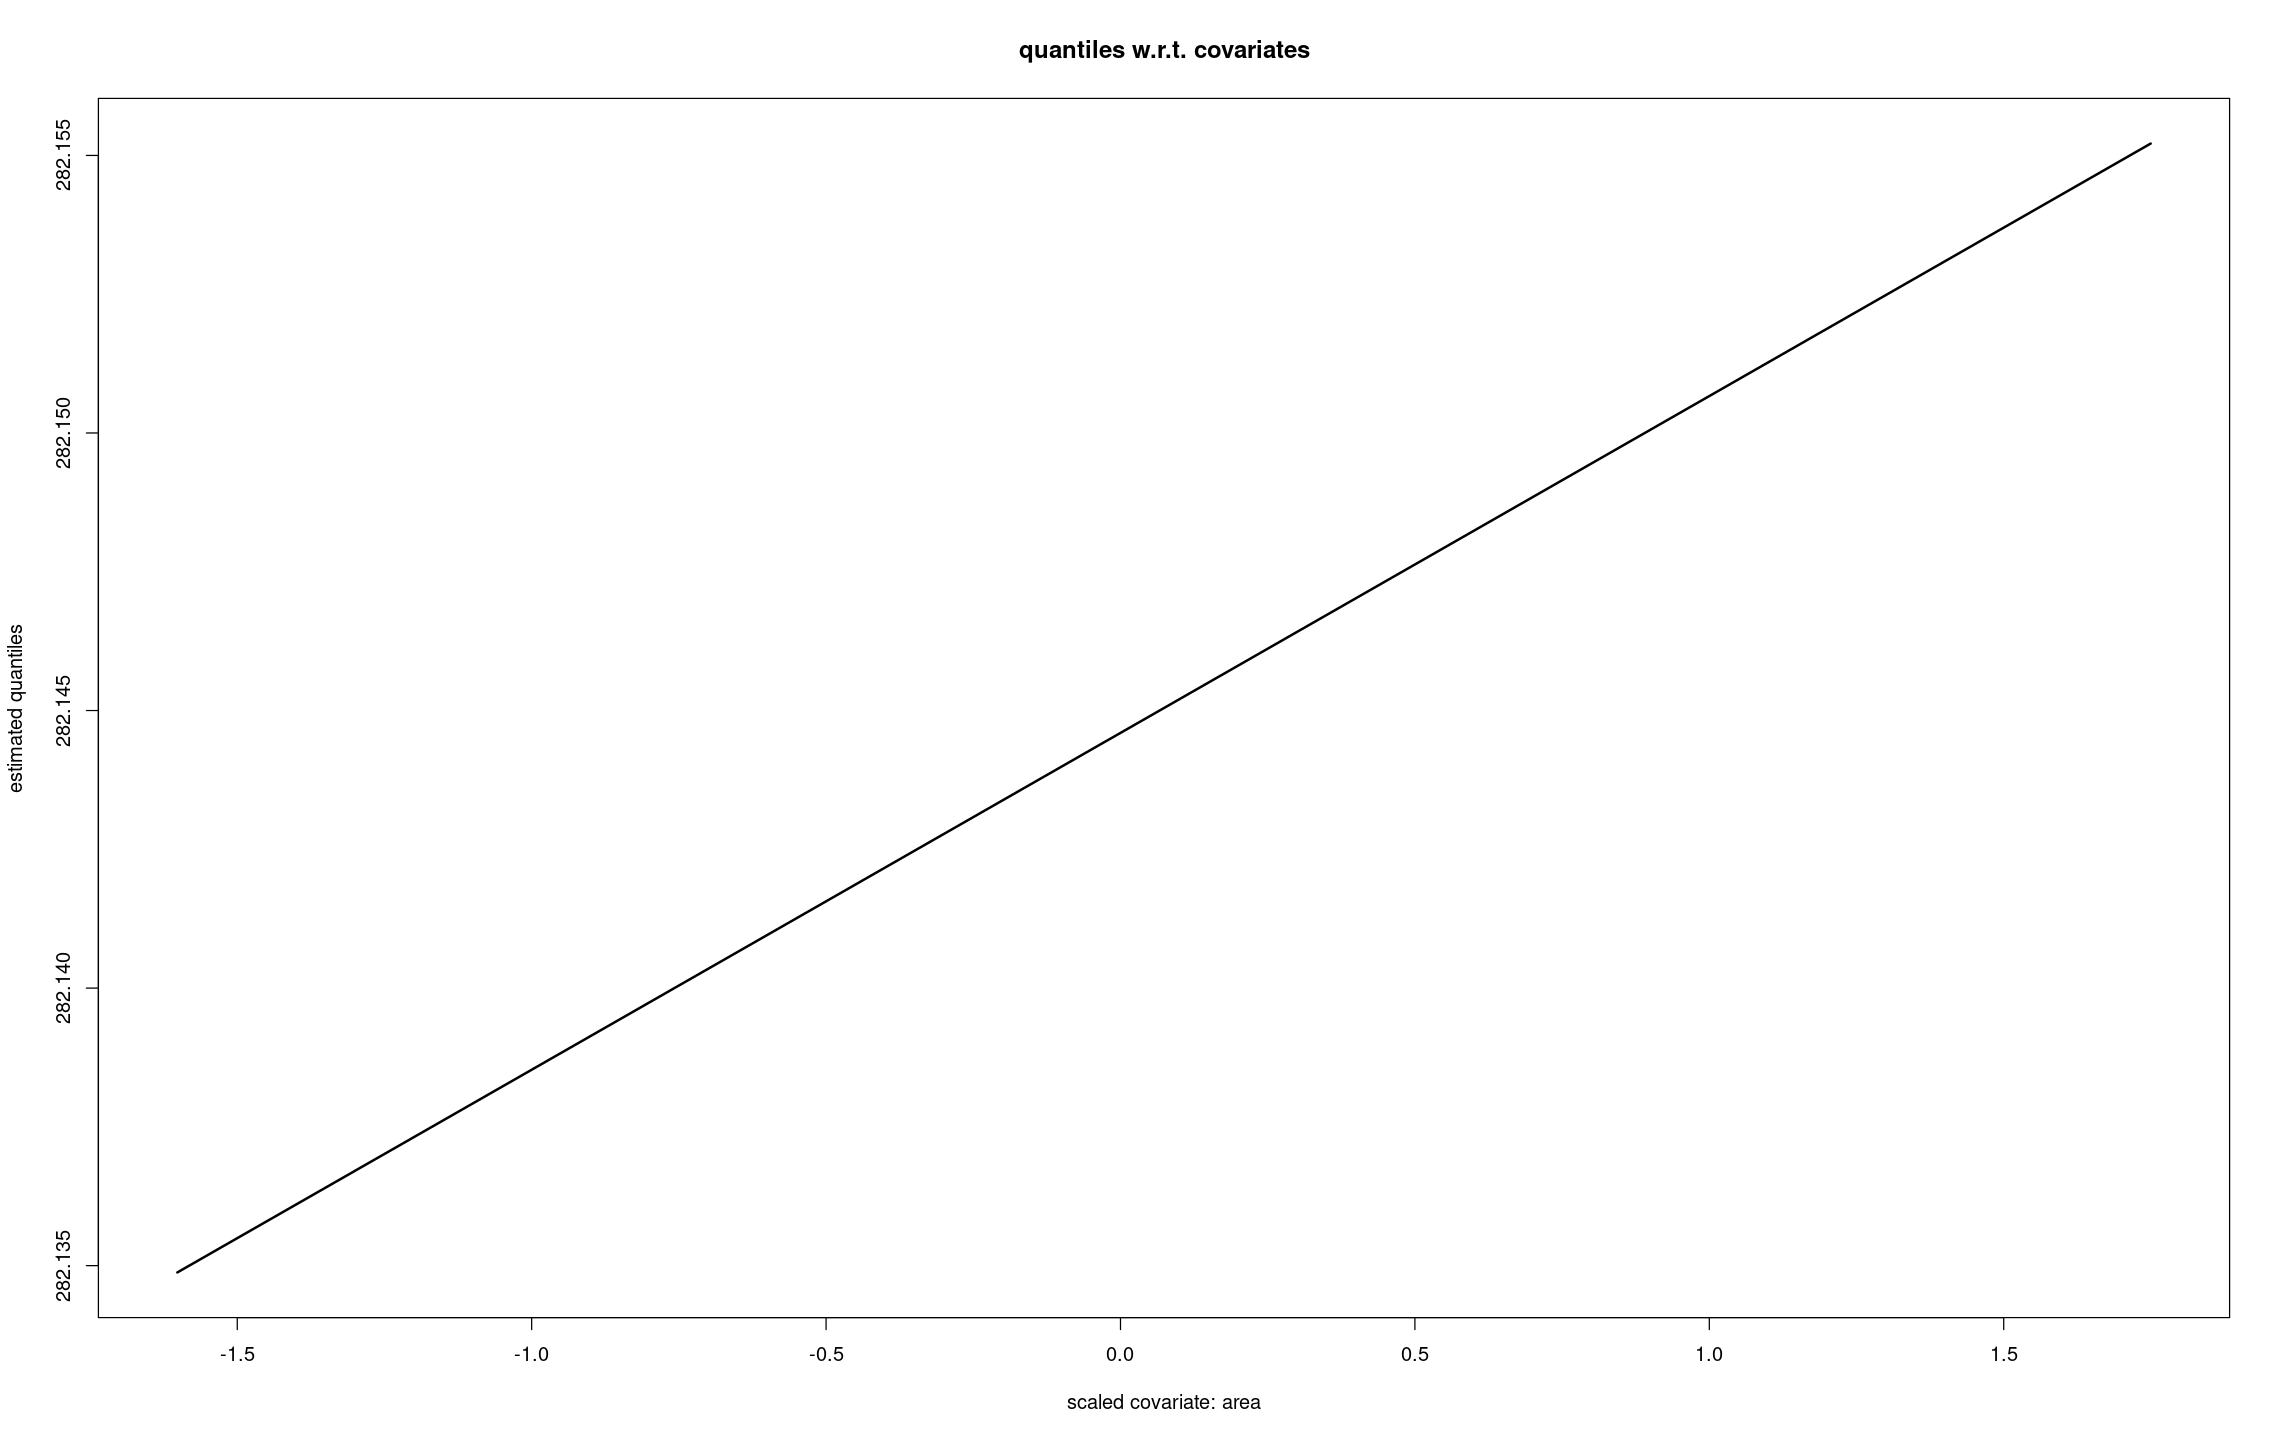

In [288]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$area, 
     y = quantiles_1,
     type = "l",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: area",
     ylab = "estimated quantiles")

In [ ]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$object, 
     y = quantiles_1,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: object",
     ylab = "estimated quantiles")

In [ ]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$velocity, 
     y = quantiles_1,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: velocity",
     ylab = "estimated quantiles")

### alpha = n^(-2)

In [289]:
alpha <- n^(-2)

print(alpha)

[1] 1.915930076e-09


In [290]:

quantiles_2 <- sapply(1:nrow(partial_data_covariates), function(index){
    new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)

    results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = FALSE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 10)

    results_geometric$covariates_1$gev_mixture_model_quantile
})


In [291]:
tail(quantiles_2)

[1] 1033936.050 1033936.051 1033936.052 1033936.049 1033936.051 1033936.051
 [7] 1033936.055 1033936.059 1033936.055 1033936.056 1033936.058 1033936.051
[13] 1033936.054 1033936.053 1033936.055 1033936.054 1033936.051 1033936.052
[19] 1033936.065 1033936.059 1033936.054 1033936.058 1033936.058 1033936.052
[25] 1033936.059 1033936.054 1033936.055 1033936.074 1033936.055 1033936.055
[31] 1033936.050 1033936.068 1033936.058 1033936.053 1033936.059 1033936.091
[37] 1033936.083 1033936.091 1033936.095 1033936.056 1033936.050 1033936.054
[43] 1033936.079 1033936.058 1033936.059 1033936.056 1033936.094 1033936.080
[49] 1033936.100 1033936.094 1033936.094 1033936.083 1033936.087 1033936.065
[55] 1033936.061 1033936.059 1033936.129 1033936.107 1033936.104 1033936.081
[61] 1033936.089 1033936.096 1033936.099 1033936.105 1033936.100 1033936.104
[67] 1033936.086 1033936.136 1033936.134 1033936.129 1033936.129 1033936.146
[73] 1033936.131 1033936.138 1033936.130

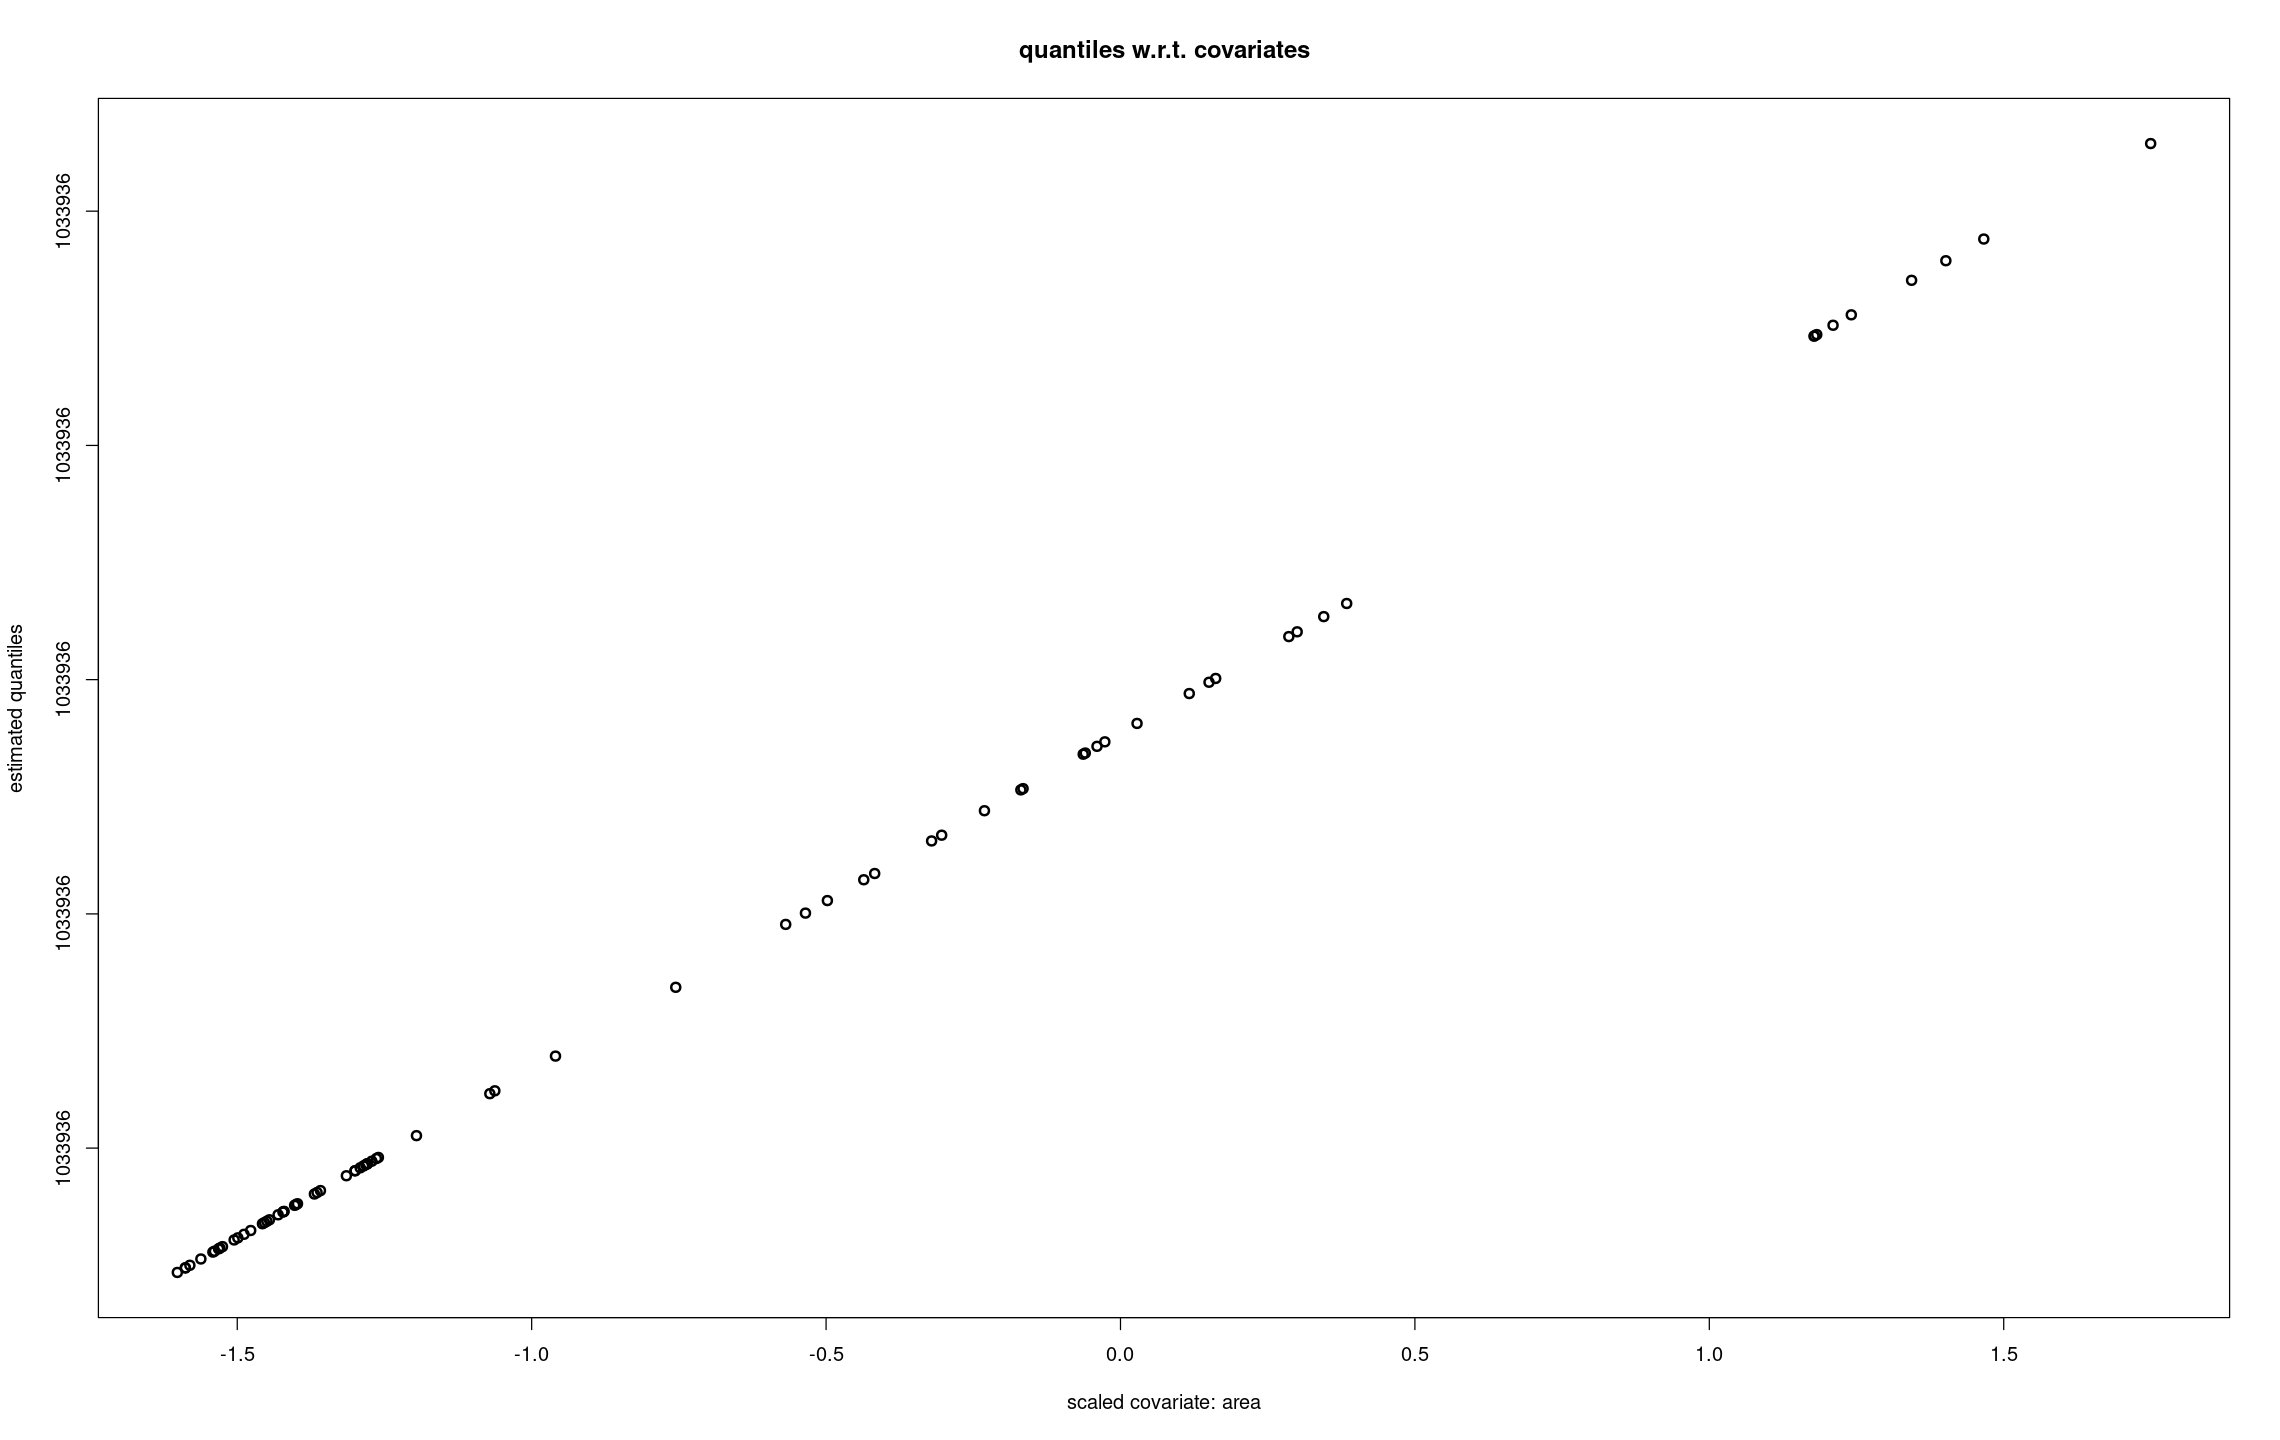

In [306]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$area, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: area",
     ylab = "estimated quantiles")

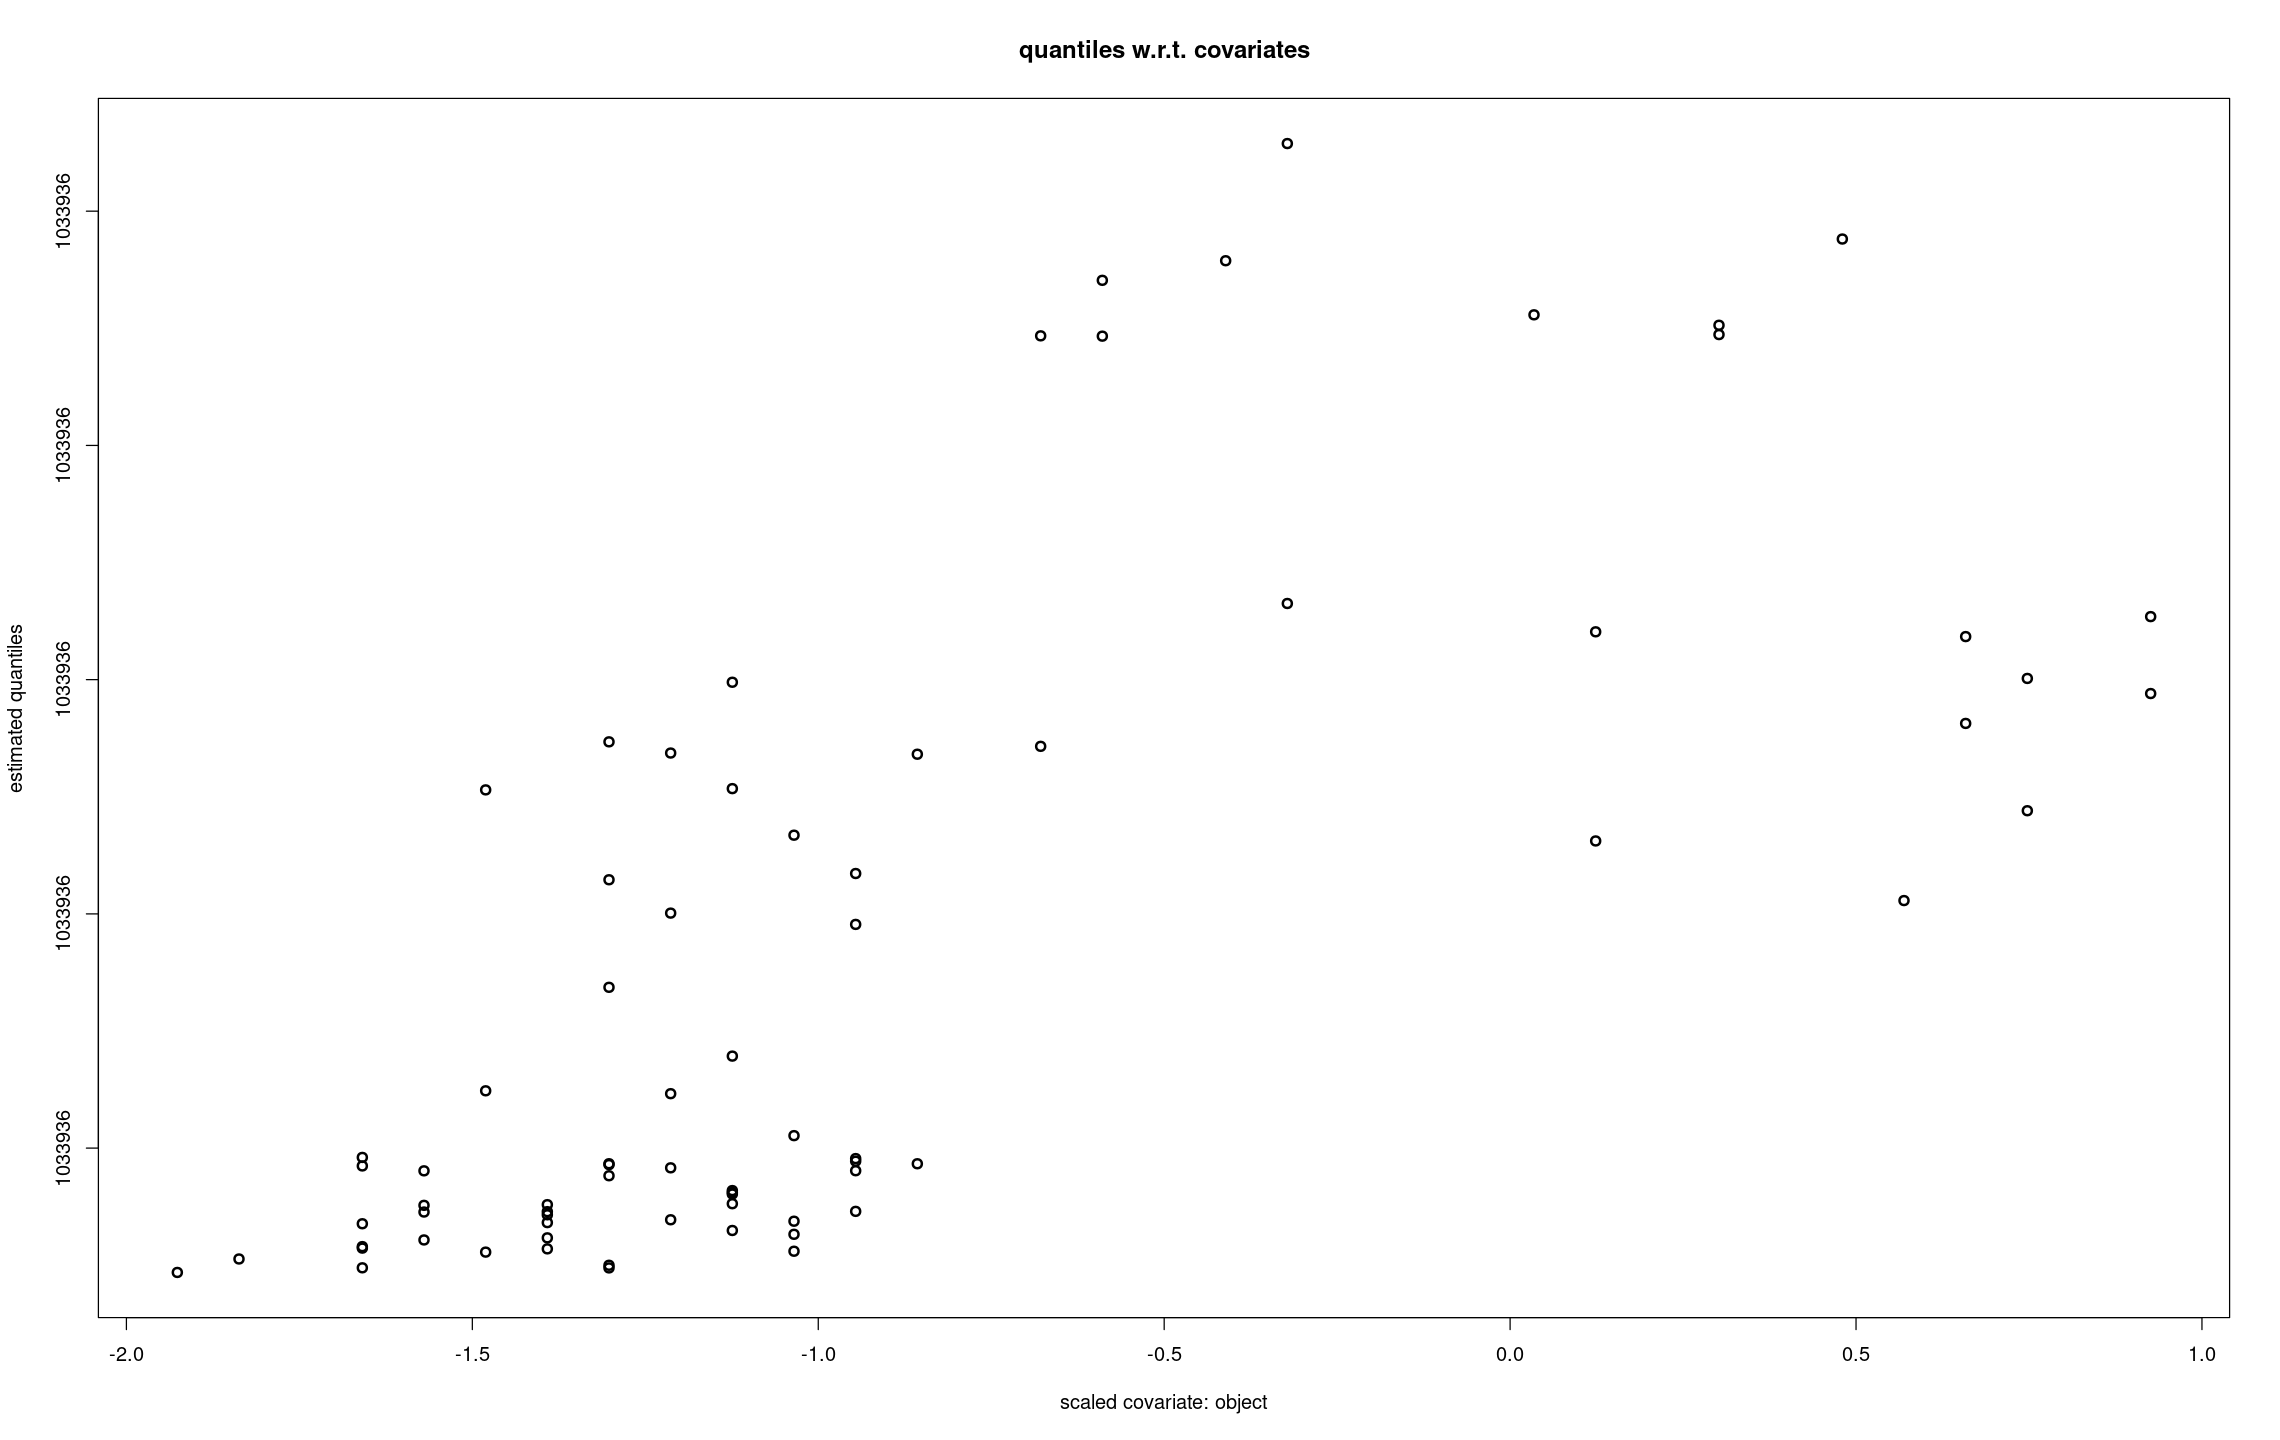

In [307]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$object, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: object",
     ylab = "estimated quantiles")

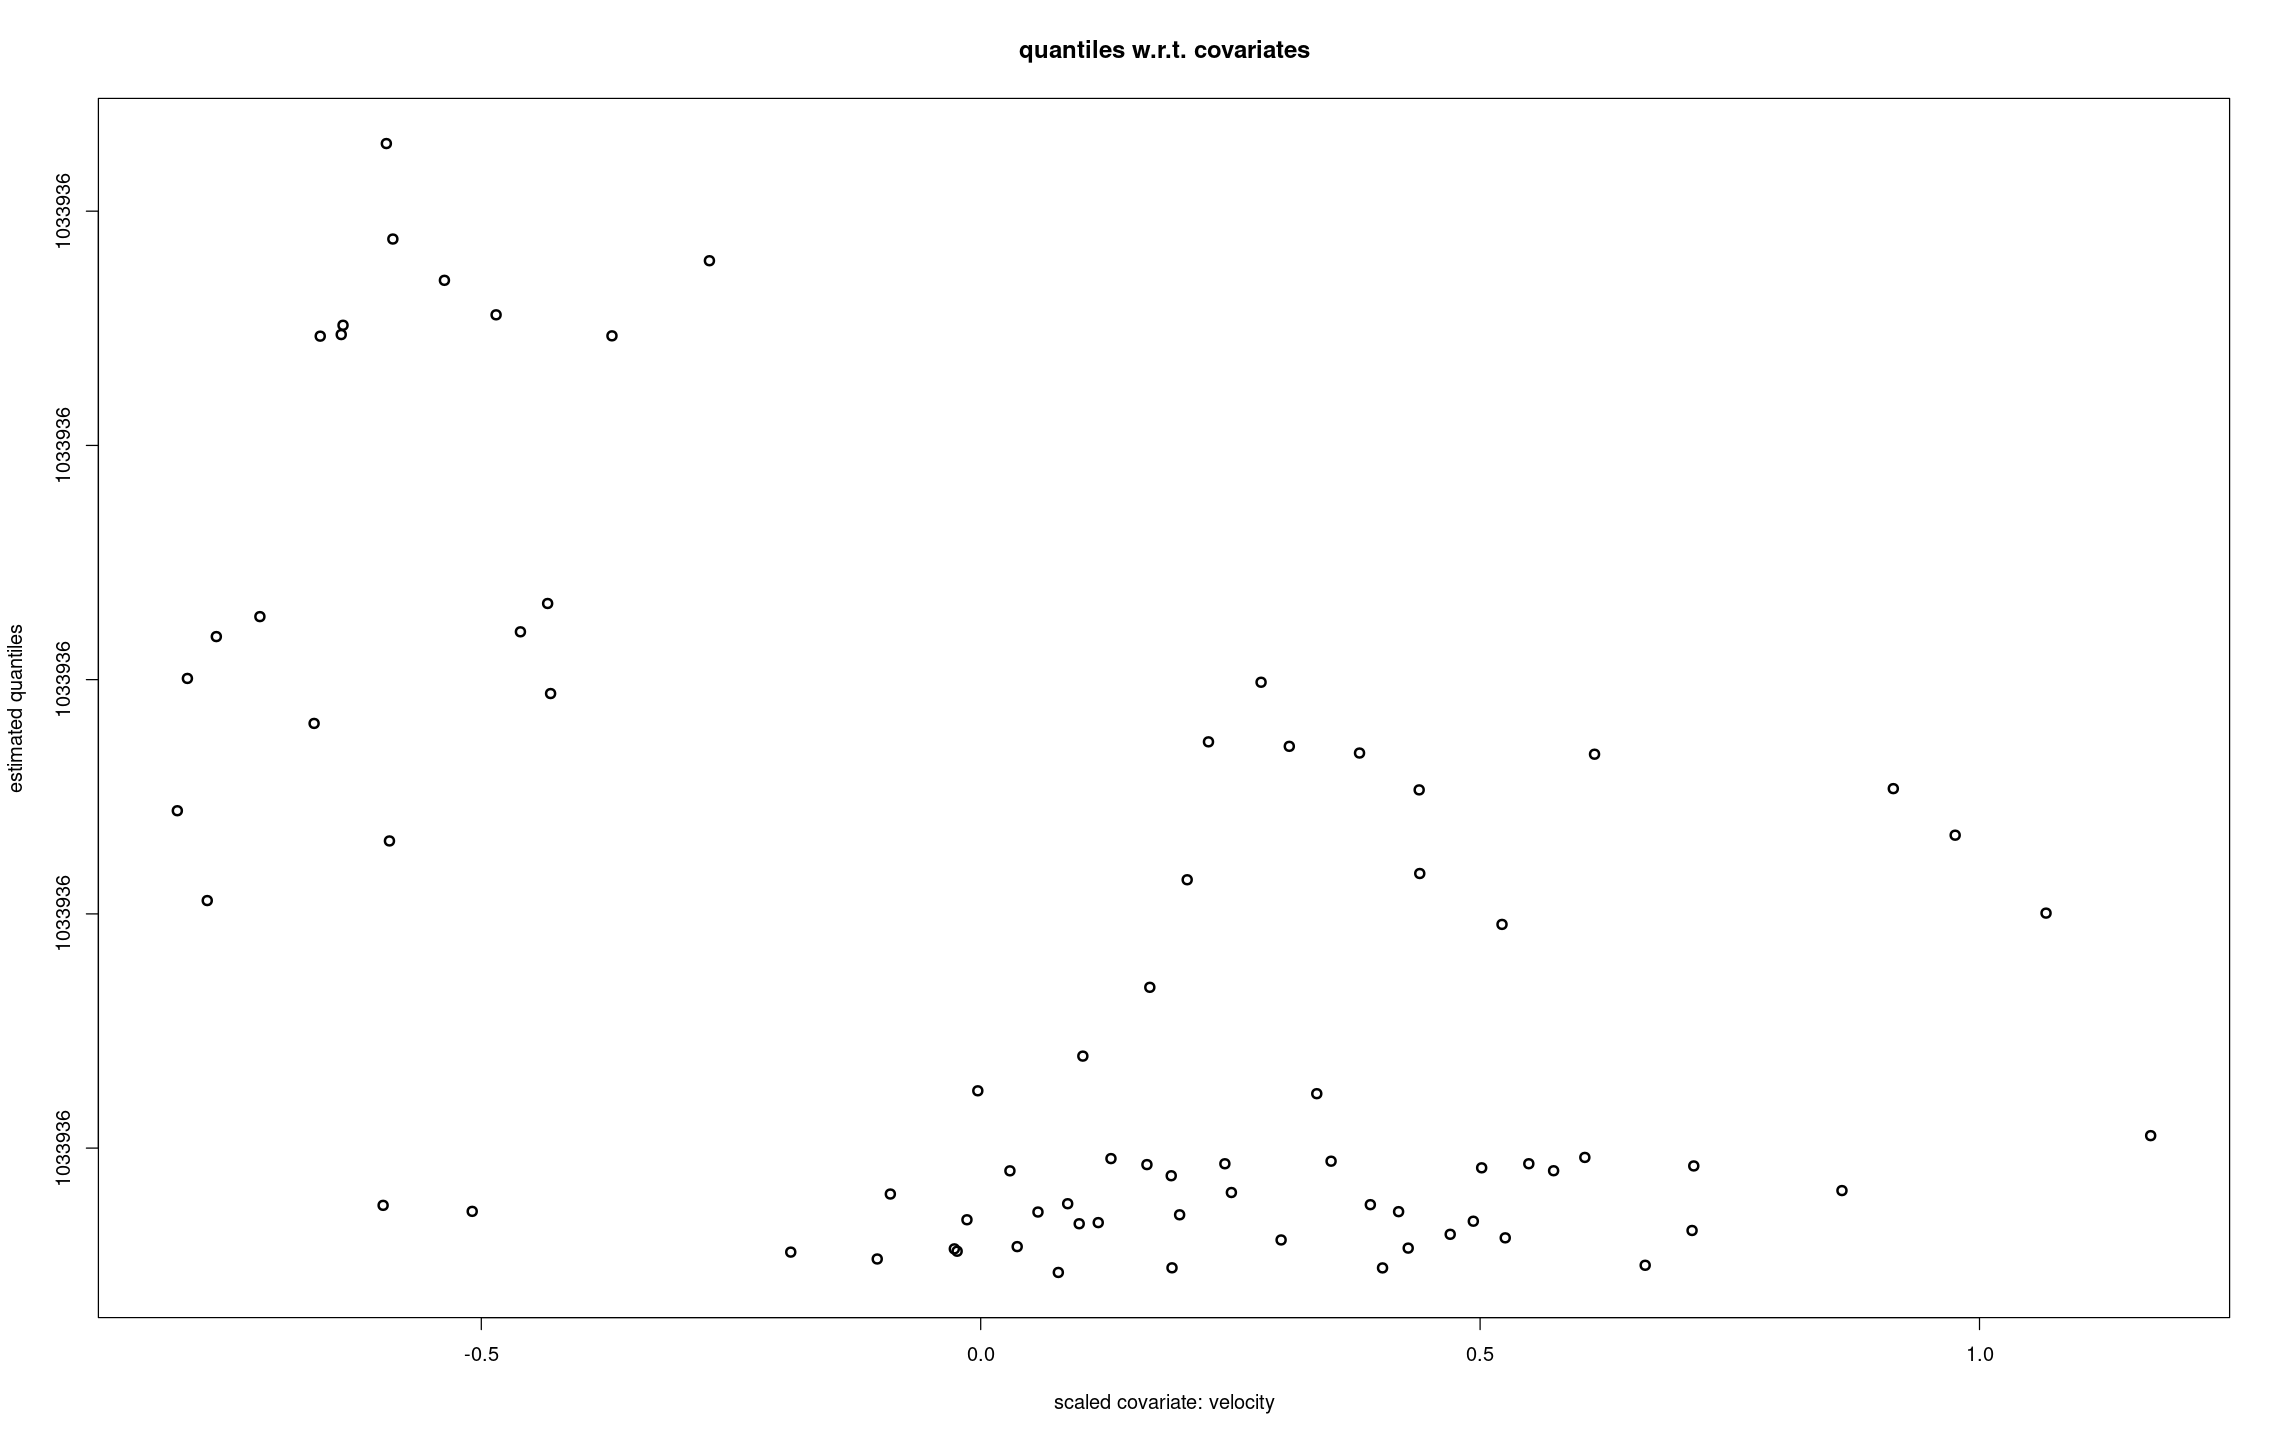

In [308]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = partial_data_covariates$velocity, 
     y = quantiles_2,
     type = "p",
     lwd = 2,
     main = "quantiles w.r.t. covariates",
     xlab = "scaled covariate: velocity",
     ylab = "estimated quantiles")

### alpha = 10^(-6)

In [293]:
alpha <- 10^(-6)

print(alpha)

[1] 1e-06


In [294]:
true_quantile <- NULL

print(true_quantile)

NULL


In [295]:
0.01*23000

[1] 230

In [296]:
new_data_covariates <- data.frame(velocity = 10^(-12),
                                  object = 0.8,
                                  area = 1)

new_data_covariates

velocity,object,area
<dbl>,<dbl>,<dbl>
1e-12,0.8,1


In [297]:
new_data_covariates_scaled <- get_standard_scaled_data(data_covariates_clean, newdata = new_data_covariates)

new_data_covariates_scaled

velocity,object,area
<dbl>,<dbl>,<dbl>
-1.613184706,-2.924681177,0.2472032662


In [298]:
index <- which.max(x)

new_data_covariates <- dplyr::slice(data_covariates_clean, index)

new_data_covariates

velocity,object,area
<dbl>,<dbl>,<dbl>
8.658947144e-11,21,0.4669624901


In [299]:
index <- which.max(x)

new_data_covariates_scaled <- dplyr::slice(data_covariates_clean_scaled, index)

# new_data_covariates_scaled <- dplyr::slice(ns_gev_mixture_model_object$all_data_covariates, index)

new_data_covariates_scaled

velocity,object,area
<dbl>,<dbl>,<dbl>
0.2509946758,-1.124193718,-1.364458149


In [300]:
several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models

predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
                                                                       data = new_data_covariates_scaled,
                                                                       use_extremal_index = TRUE,
                                                                       normalize_parameters = TRUE)

do.call(rbind, predicted_parameters)

,location,scale,shape
,<dbl>,<dbl>,<dbl>
2,0.9230338385,0.1073019240,0.8372243637
3,2.0685306179,1.0393769527,0.8141511213
5,1.6615825165,0.7042208536,0.8164640555
8,1.5628079708,0.6159263532,0.8045388315
16,1.2949383151,0.3876851769,0.7719587005
21,1.2217313849,0.3287922840,0.7301749972
22,1.3700520651,0.4399926145,0.7474137588
25,1.3521710509,0.4266377969,0.7271788411
30,1.1881376181,0.2911883070,0.7530780925


In [301]:
results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = new_data_covariates_scaled,
                                                                        do.ci = TRUE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
2,759.8621858,2472.172171,4184.482157
3,3321.3091828,18768.444562,34215.579942
5,-786.4245697,13016.049405,26818.523380
8,-3289.4957445,10043.727718,23376.951181
16,-3864.6100375,4488.334853,12841.279743
21,-2591.9323725,2459.758412,7511.449197
22,-3979.2459423,3939.673383,11858.592708
25,-3652.0890297,3093.496839,9839.082707
30,-4189.3595659,2766.600889,9722.561343


In [302]:
results_arithmetic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                         alpha = alpha,
                                                                         data = new_data_covariates_scaled,
                                                                         do.ci = TRUE,
                                                                         confidence_level = 0.95,
                                                                         kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                         iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
2,759.8621858,2472.172171,4184.482157
3,3321.3091828,18768.444562,34215.579942
5,-786.4245697,13016.049405,26818.523380
8,-3289.4957445,10043.727718,23376.951181
16,-3864.6100375,4488.334853,12841.279743
21,-2591.9323725,2459.758412,7511.449197
22,-3979.2459423,3939.673383,11858.592708
25,-3652.0890297,3093.496839,9839.082707
30,-4189.3595659,2766.600889,9722.561343


In [303]:
results_harmonic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                       alpha = alpha,
                                                                       data = new_data_covariates_scaled,
                                                                       do.ci = TRUE,
                                                                       confidence_level = 0.95,
                                                                       kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                       iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
2,759.8621858,2472.172171,4184.482157
3,3321.3091828,18768.444562,34215.579942
5,-786.4245697,13016.049405,26818.523380
8,-3289.4957445,10043.727718,23376.951181
16,-3864.6100375,4488.334853,12841.279743
21,-2591.9323725,2459.758412,7511.449197
22,-3979.2459423,3939.673383,11858.592708
25,-3652.0890297,3093.496839,9839.082707
30,-4189.3595659,2766.600889,9722.561343


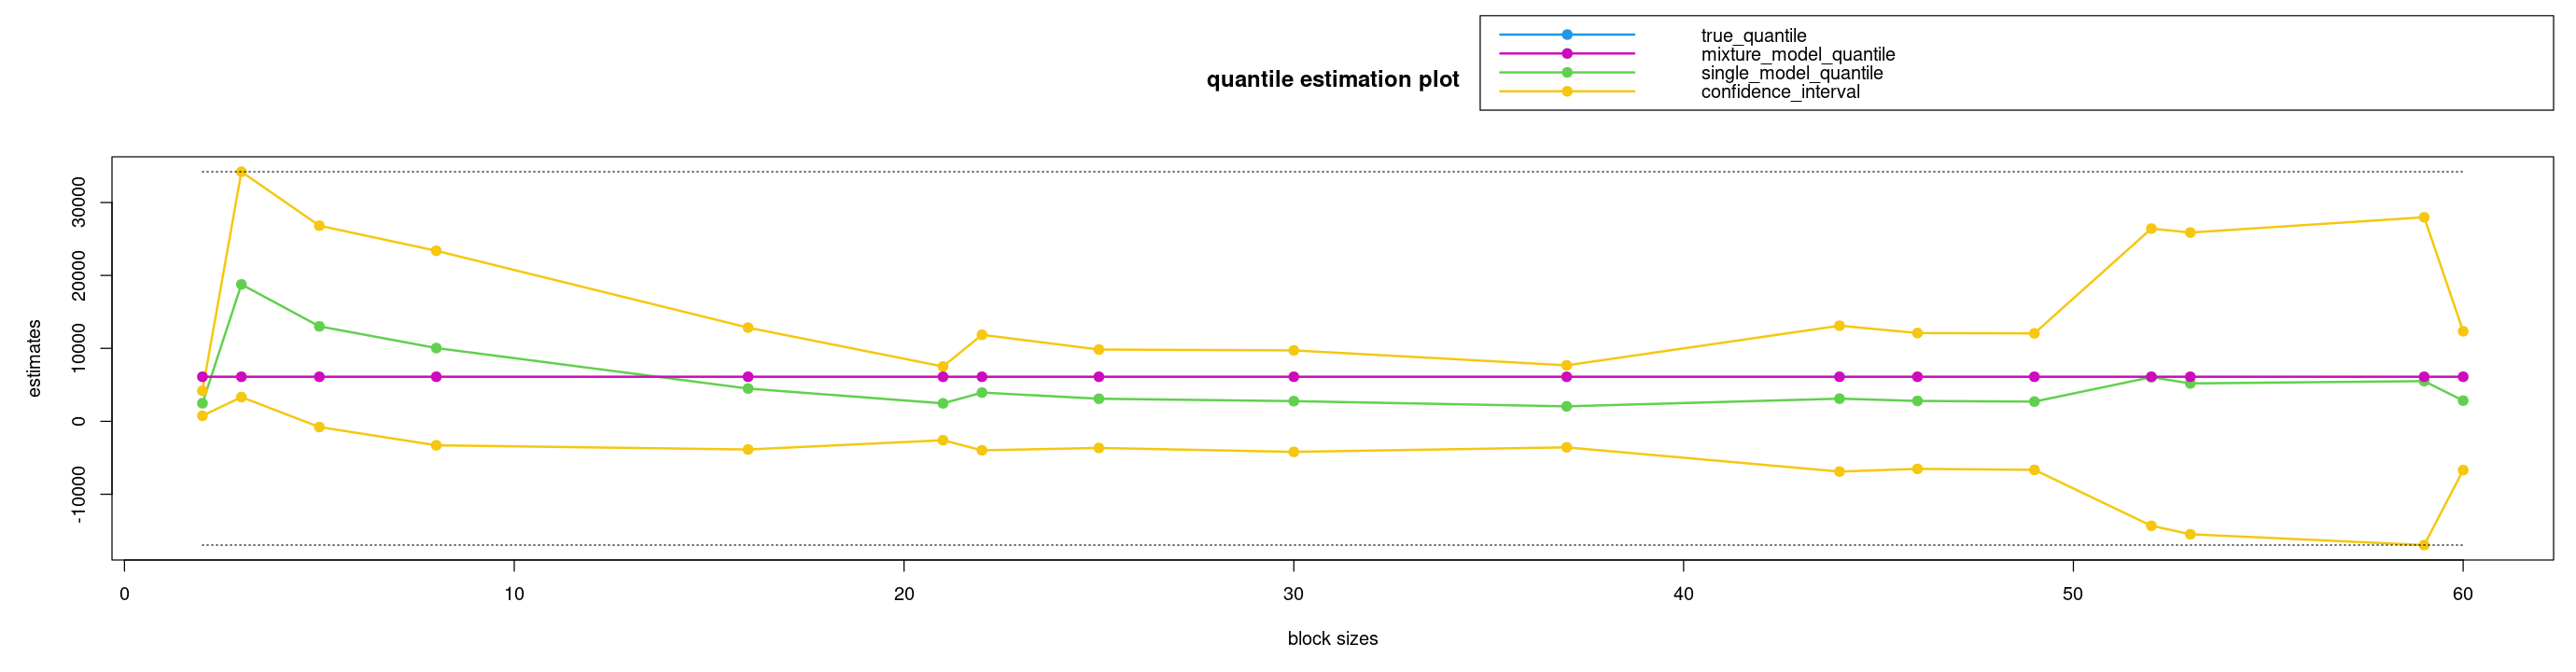

In [304]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                        alpha = alpha,
                                                        data = NULL,
                                                        data_index = 1,
                                                        true_quantile = NULL,
                                                        do.ci = TRUE,
                                                        confidence_level = 0.95,
                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                        iterations = 100,
                                                        xlab = "block sizes",
                                                        ylab = "estimates",
                                                        main = "quantile estimation plot",
                                                        legend_position = "topright")
